# Step 1: Import libraies and dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Airbnb_data.csv')

In [4]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [5]:
df.shape

(74111, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

# Step 2 - Handling the missing values

In [7]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64

In [8]:
sort_data = df.sort_values('log_price')

<Axes: >

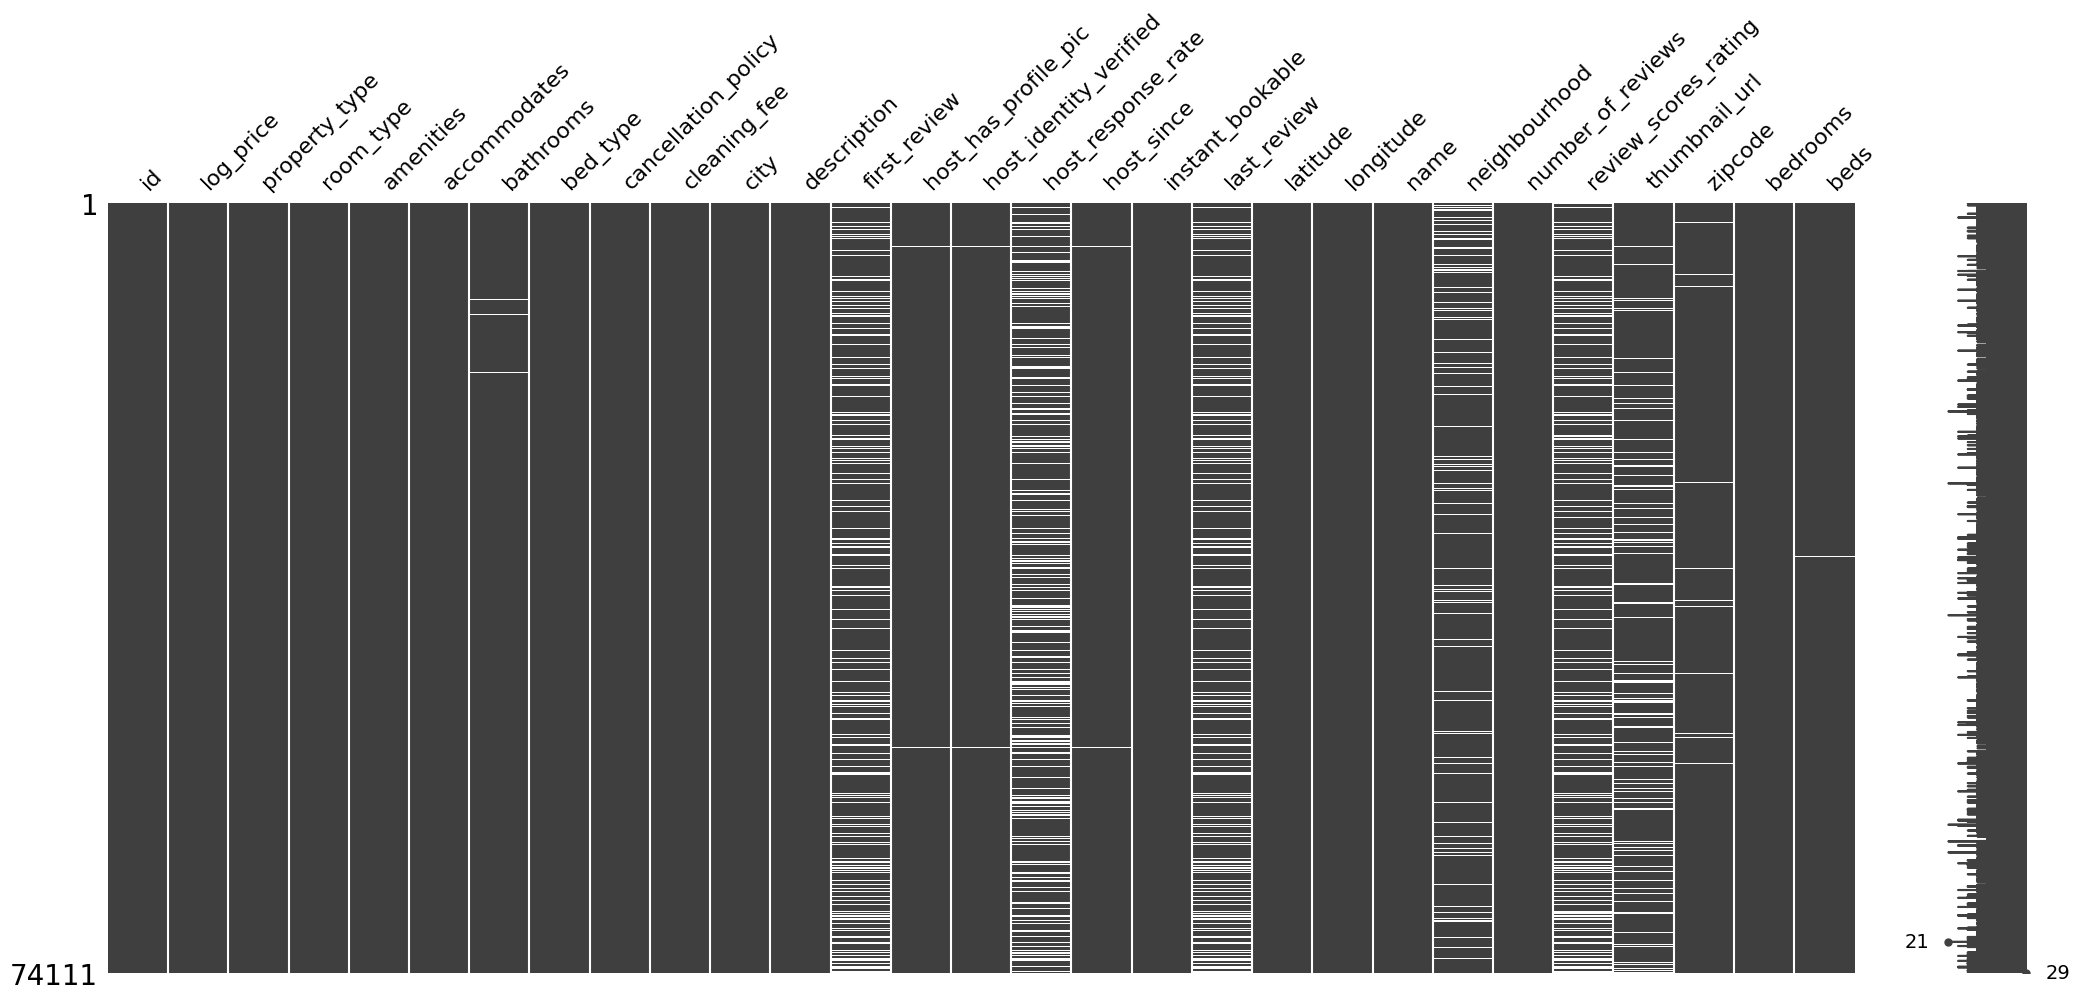

In [9]:
msno.matrix(sort_data)

### droping unused column

In [10]:
df.drop(['id', 'description', 'first_review', 'last_review', 'name', 'thumbnail_url', 'host_since', 'host_response_rate'],axis= 1,inplace = True)

In [11]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'instant_bookable',
       'latitude', 'longitude', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

<Axes: >

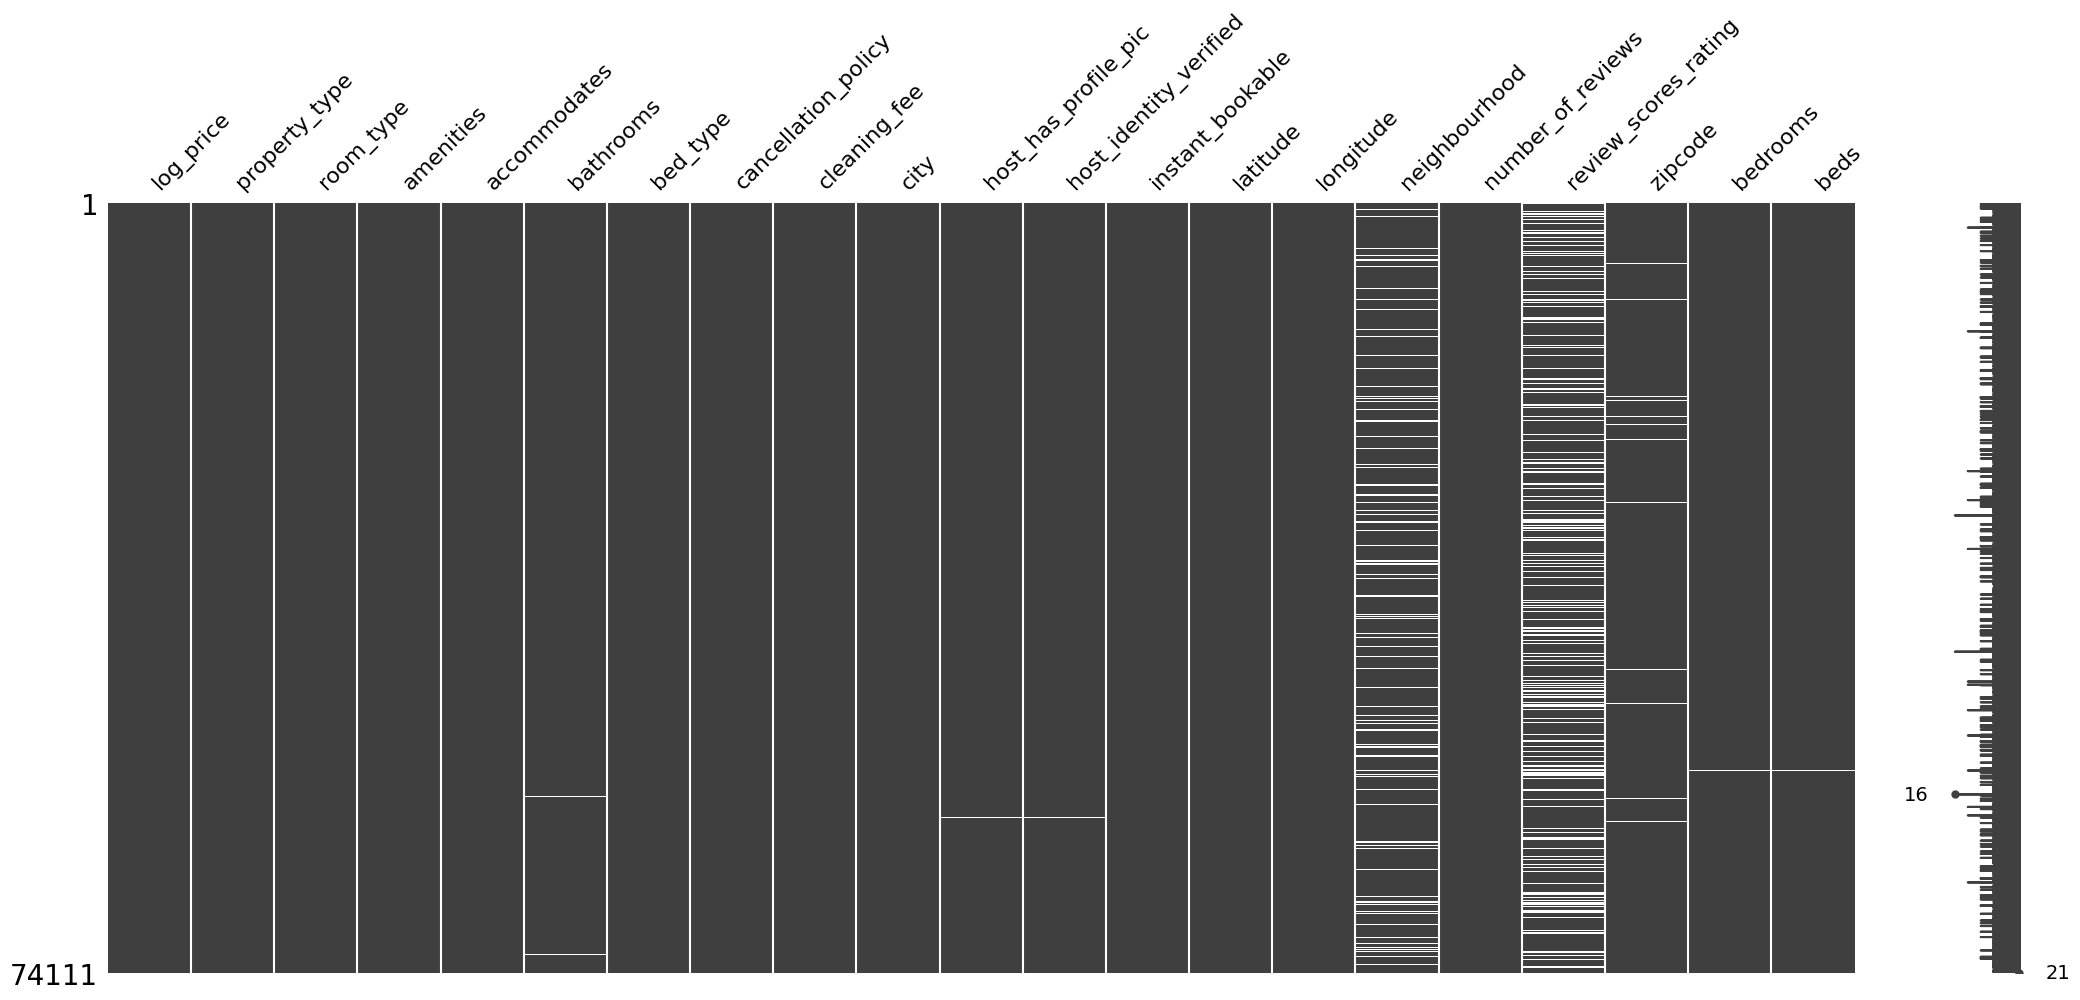

In [12]:
msno.matrix(df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   amenities               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               73911 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   city                    74111 non-null  object 
 10  host_has_profile_pic    73923 non-null  object 
 11  host_identity_verified  73923 non-null  object 
 12  instant_bookable        74111 non-null  object 
 13  latitude                74111 non-null  float64
 14  longitude               74111 non-null

In [14]:
df['bathrooms'] =df['bathrooms'].fillna(df['bathrooms'].median())
df['host_has_profile_pic'] =df['host_has_profile_pic'].fillna(df['host_has_profile_pic'].mode()[0])
df['host_identity_verified'] =df['host_identity_verified'].fillna(df['host_identity_verified'].mode()[0])
df['neighbourhood'] =df['neighbourhood'].fillna(df['neighbourhood'].mode()[0])
df['review_scores_rating'] =df['review_scores_rating'].fillna(df['review_scores_rating'].median())
df['zipcode'] =df['zipcode'].fillna(df['zipcode'].mode()[0])
df['bedrooms'] =df['bedrooms'].fillna(df['bedrooms'].median())
df['beds'] =df['beds'].fillna(df['beds'].median())

In [15]:
df.isnull().sum()

log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_has_profile_pic      0
host_identity_verified    0
instant_bookable          0
latitude                  0
longitude                 0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

# Step 3 - Exploratory Data Analysis (EDA)

## Univariate Analysis: Distribution of numerical & categorical features.

In [17]:
df.describe()

,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,4.782069,3.155146,1.234628,38.445958,-92.397525,20.900568,94.503434,1.265467,1.709611
std,0.717394,2.153589,0.581386,3.080167,21.705322,37.828641,6.943159,0.851671,1.253389
min,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,93.000000,1.000000,1.000000
50%,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,99.000000,1.000000,2.000000
max,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [18]:
df.describe(include=['O'])

,property_type,room_type,amenities,bed_type,cancellation_policy,city,host_has_profile_pic,host_identity_verified,instant_bookable,neighbourhood,zipcode
count,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111,74111
unique,35,3,67122,5,5,6,2,2,2,619,668
top,Apartment,Entire home/apt,{},Real Bed,strict,NYC,t,t,f,Williamsburg,11211
freq,49003,41310,586,72028,32374,32349,73885,49936,54660,9734,2586


#### Numerical Features

In [19]:
num_col = df.dtypes[df.dtypes != 'object'].index

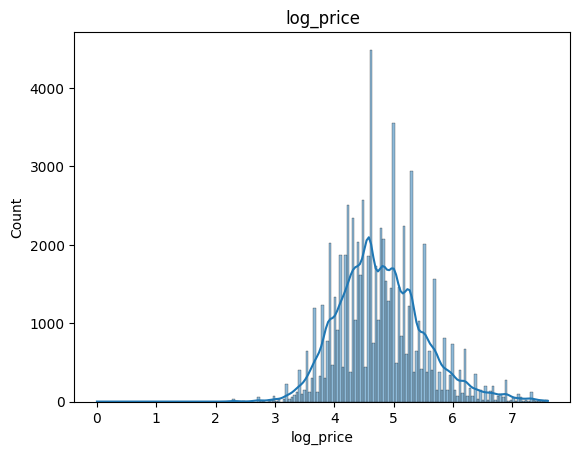

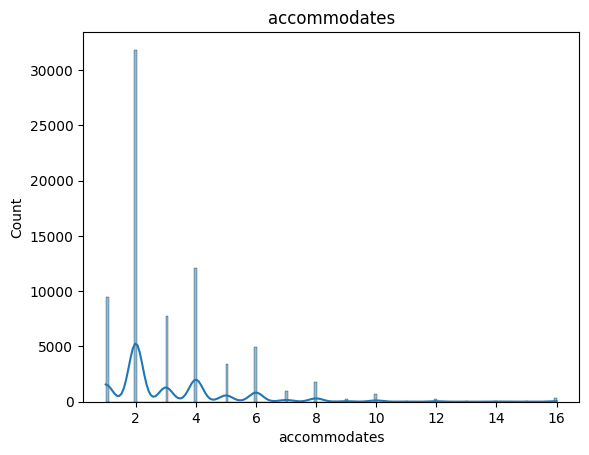

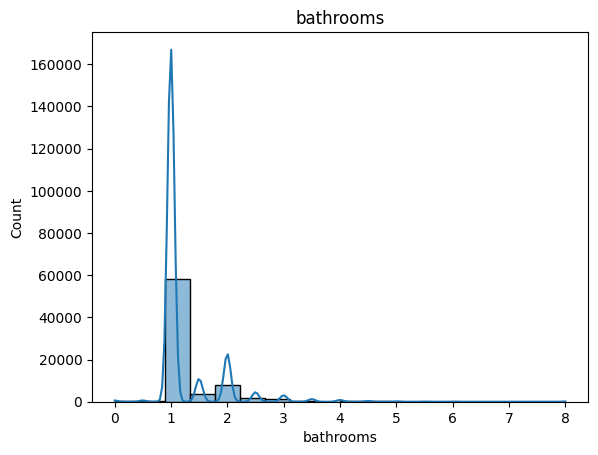

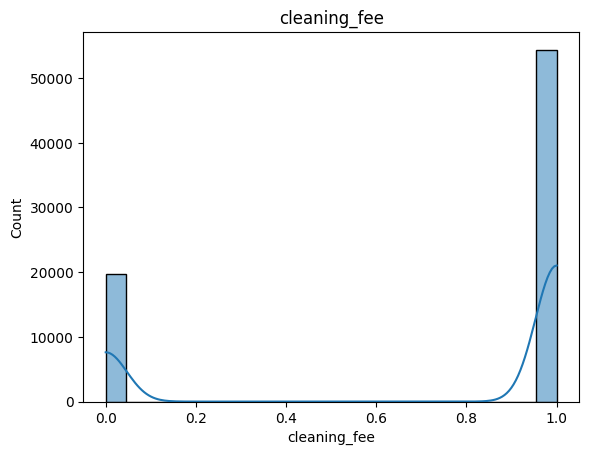

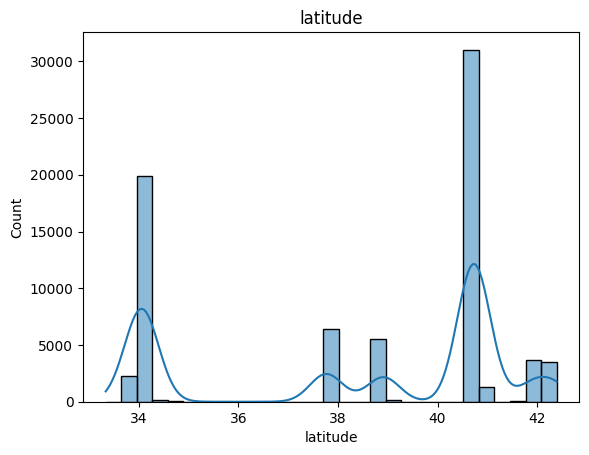

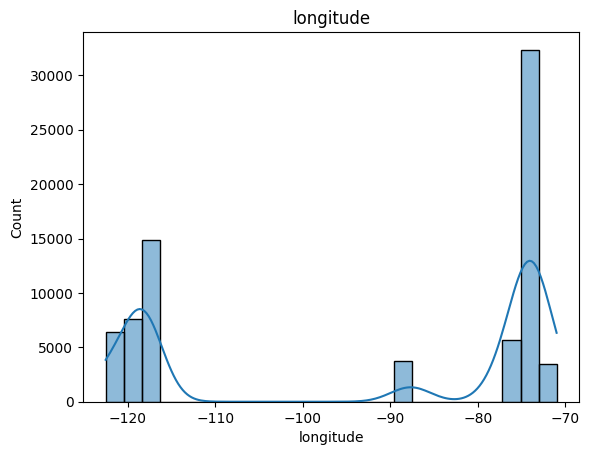

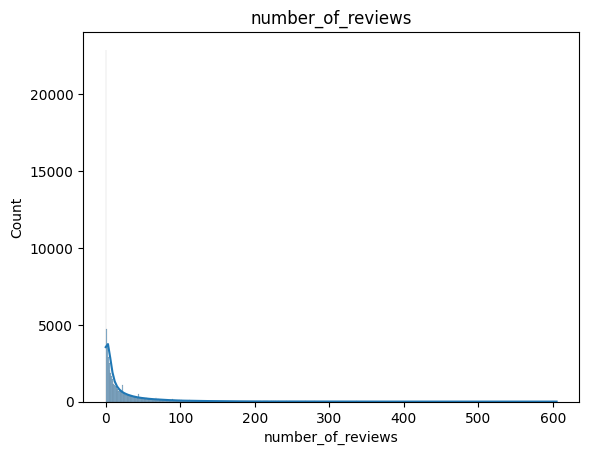

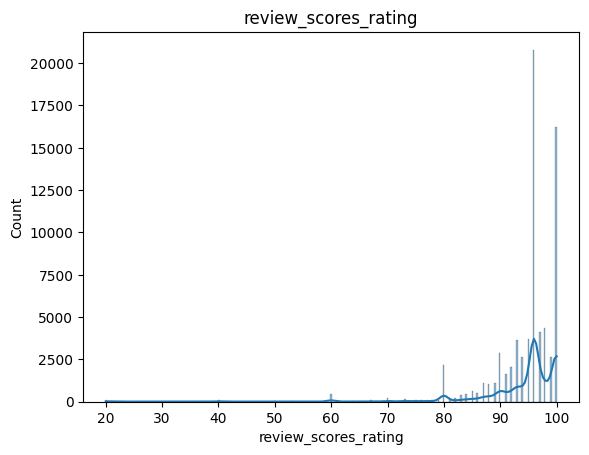

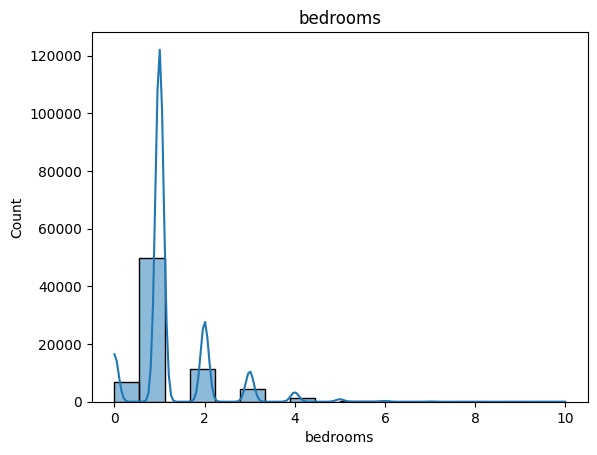

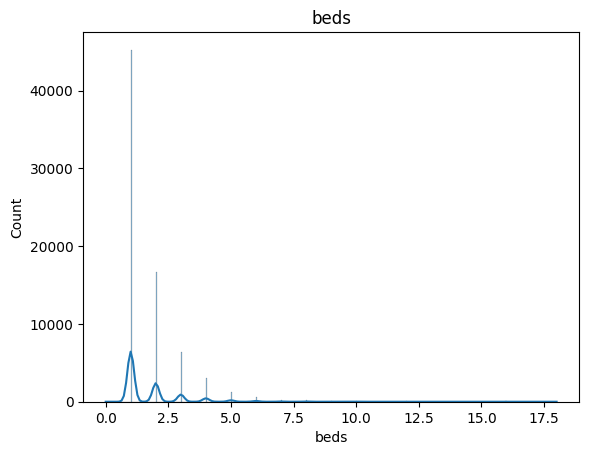

In [20]:
for i in num_col:
    sns.histplot(x=df[i],kde=True)
    plt.title(i)
    plt.show()

### Categorical Features

In [21]:
cat = df.dtypes[df.dtypes== 'object'].index

In [22]:
cat = cat.drop('amenities')

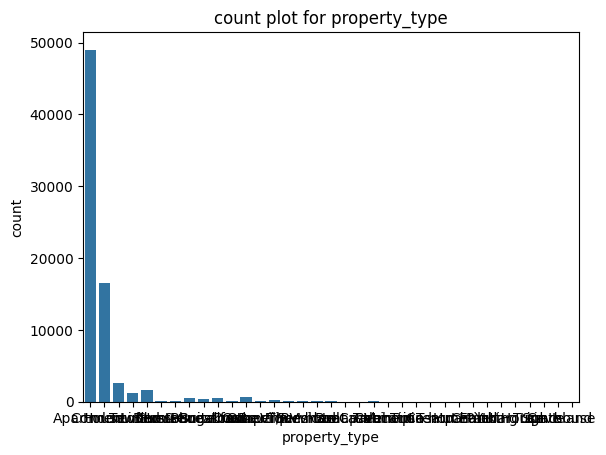

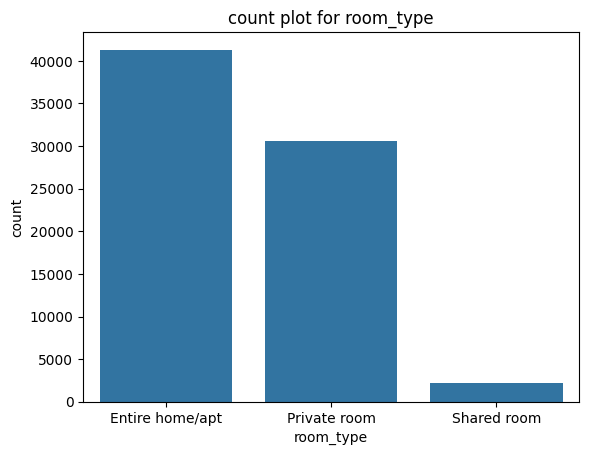

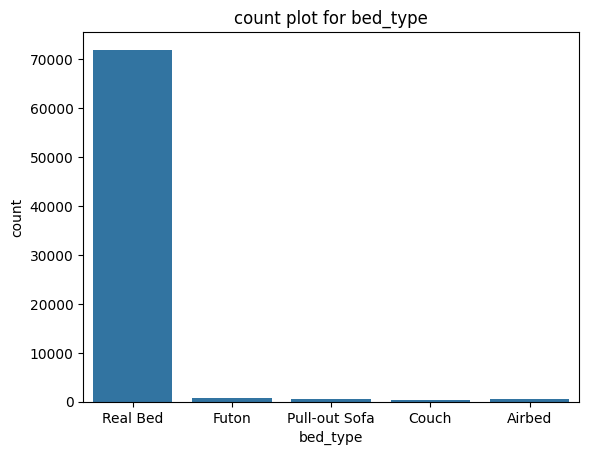

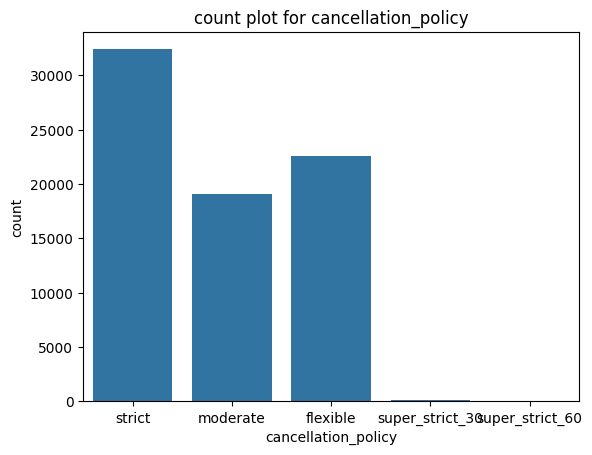

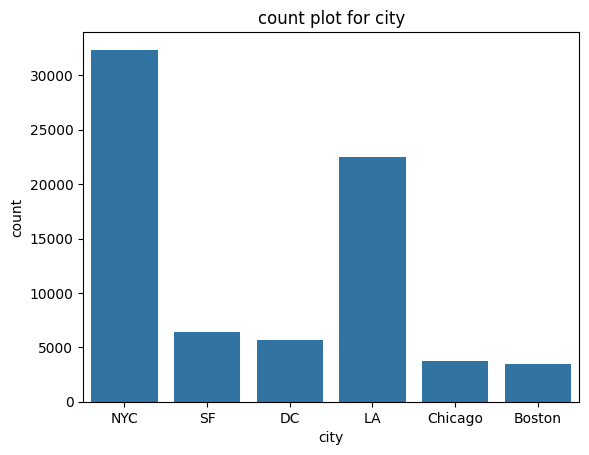

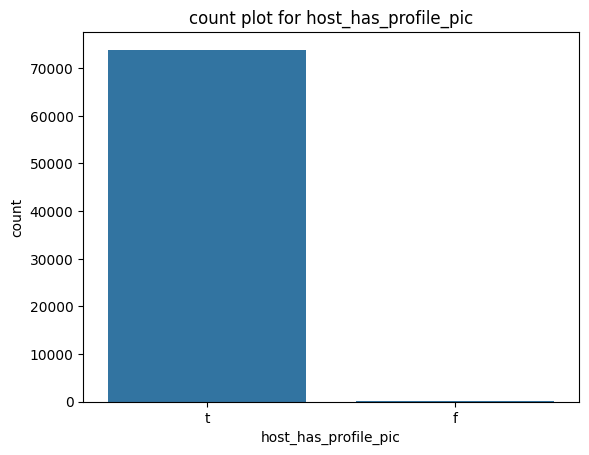

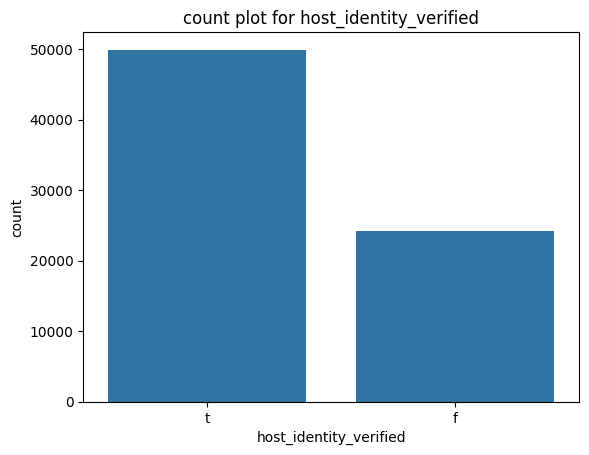

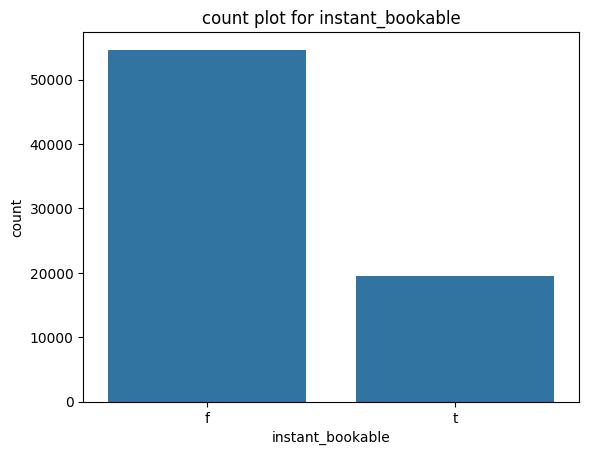

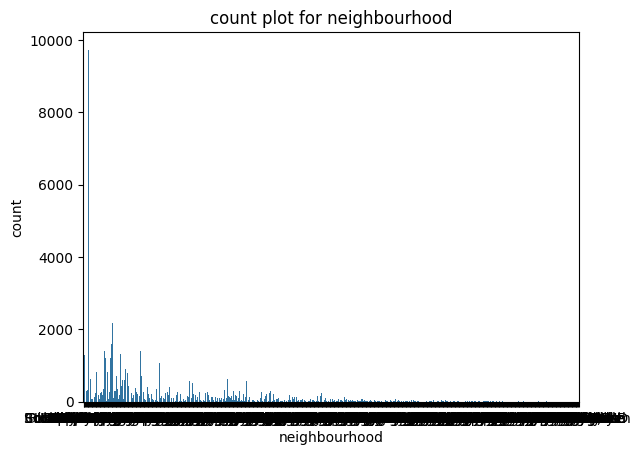

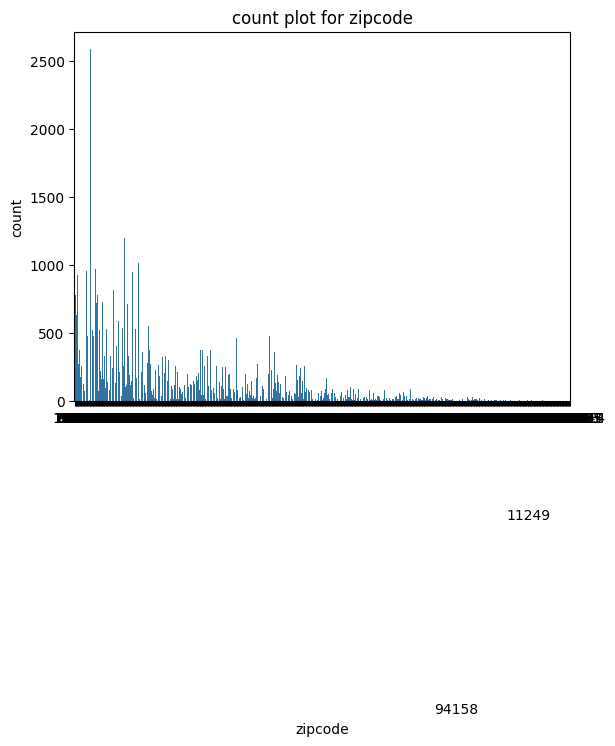

In [23]:
for i in cat:
    sns.countplot(x=df[i])
    plt.title('count plot for '+i)
    plt.show()

## Bivariate Analysis: Relationship with log_price.

### log_price by numerical feature

In [24]:
num_col

Index(['log_price', 'accommodates', 'bathrooms', 'cleaning_fee', 'latitude',
       'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms',
       'beds'],
      dtype='object')

In [25]:
numerical = num_col.drop(['log_price','cleaning_fee'])

In [26]:
numerical

Index(['accommodates', 'bathrooms', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds'],
      dtype='object')

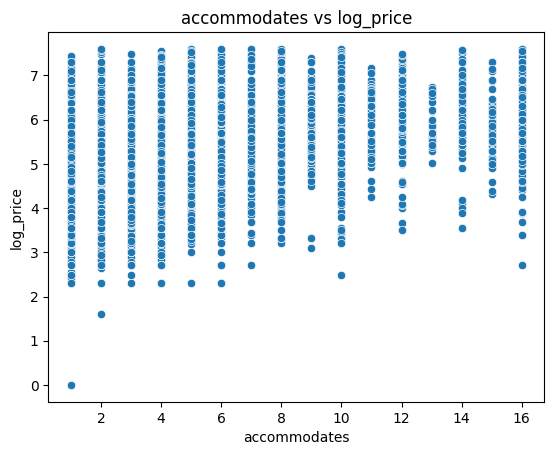

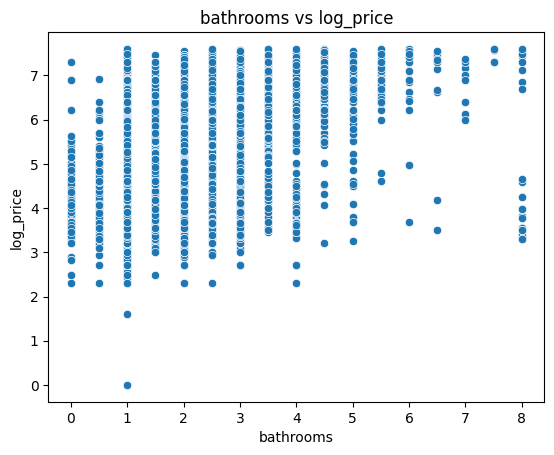

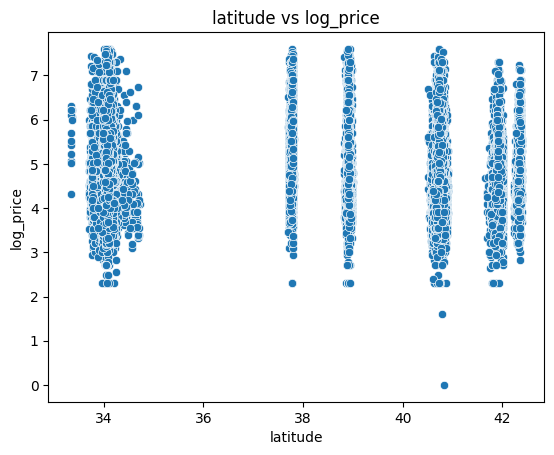

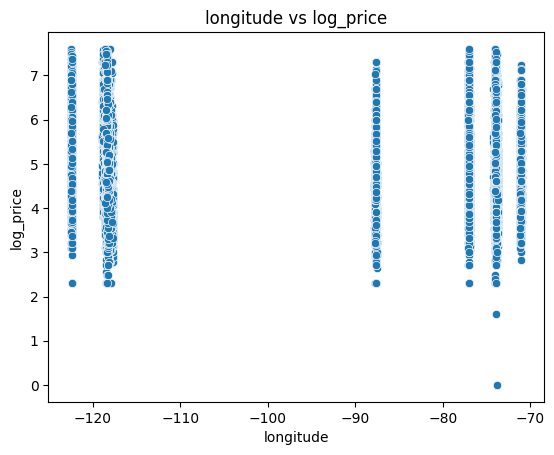

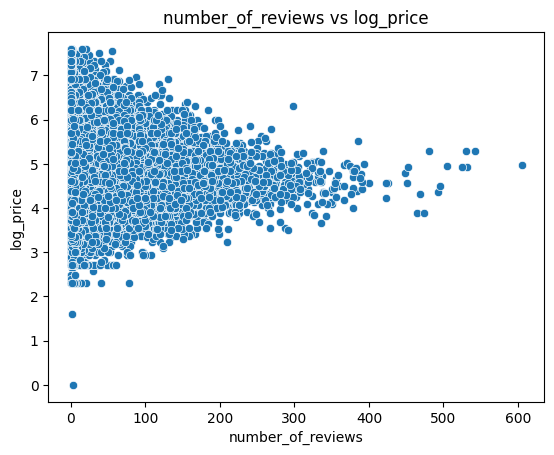

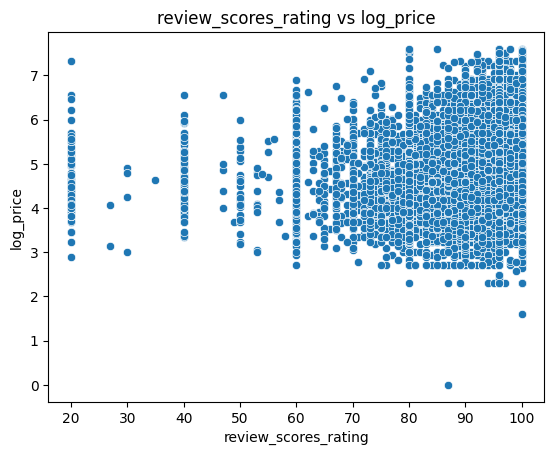

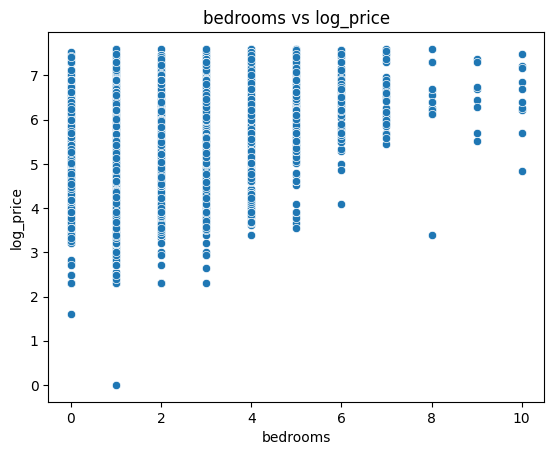

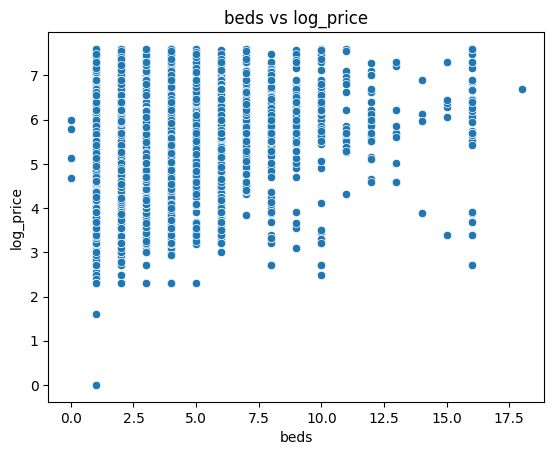

In [27]:
for i in numerical:
    sns.scatterplot(data=df,x=df[i],y=df['log_price'])
    plt.title(f'{i} vs log_price')
    plt.show()

In [28]:
df[num_col].corr()['log_price'].sort_values(ascending=False)

log_price               1.000000
accommodates            0.567574
bedrooms                0.473028
beds                    0.441953
bathrooms               0.355174
cleaning_fee            0.111191
review_scores_rating    0.084180
latitude               -0.002193
number_of_reviews      -0.032470
longitude              -0.047529
Name: log_price, dtype: float64

### log_price by categorical variable

In [29]:
cat

Index(['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'instant_bookable',
       'neighbourhood', 'zipcode'],
      dtype='object')

In [30]:
cat_col = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'instant_bookable',
       'neighbourhood','cleaning_fee']

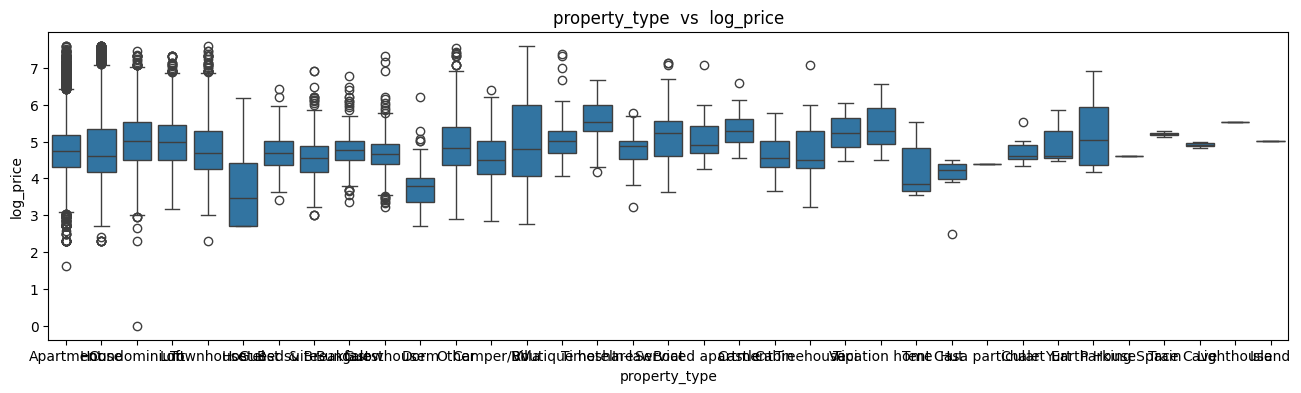

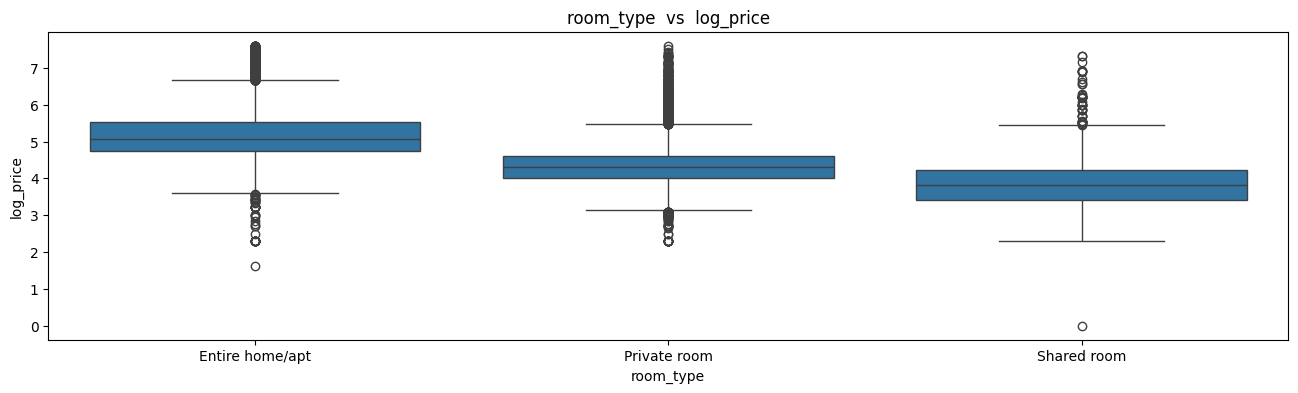

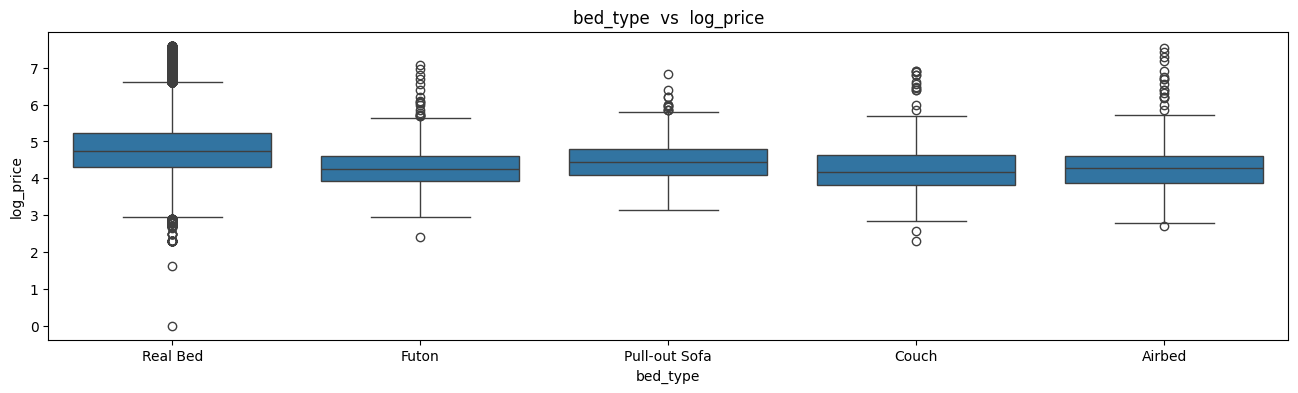

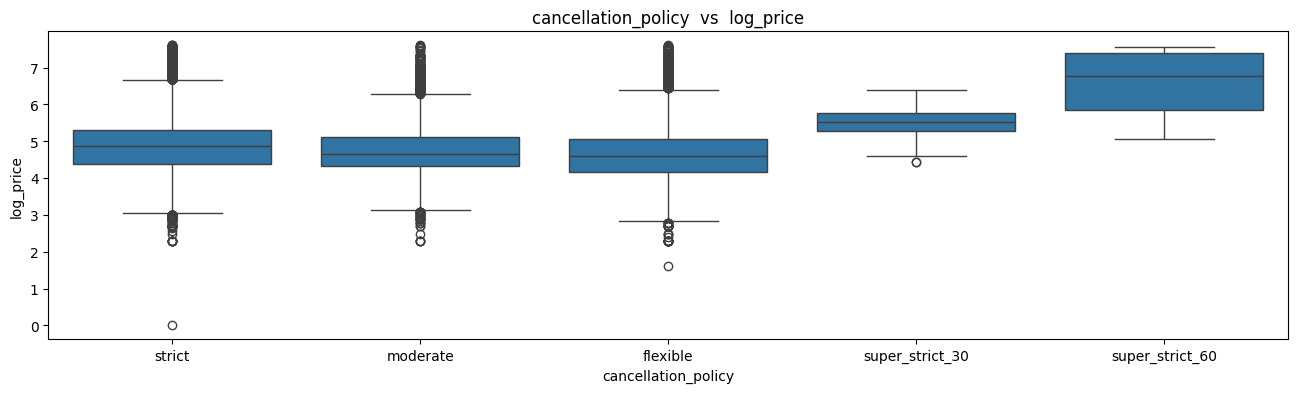

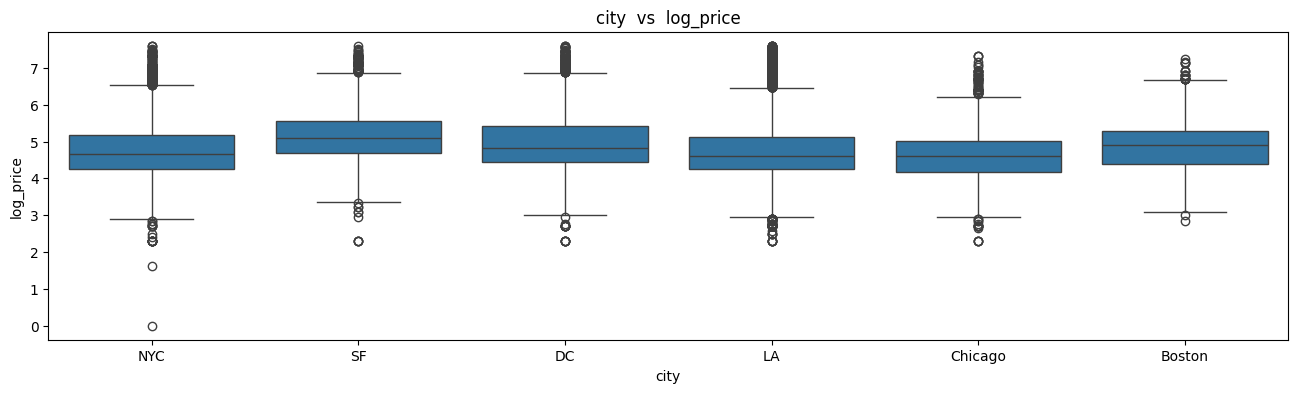

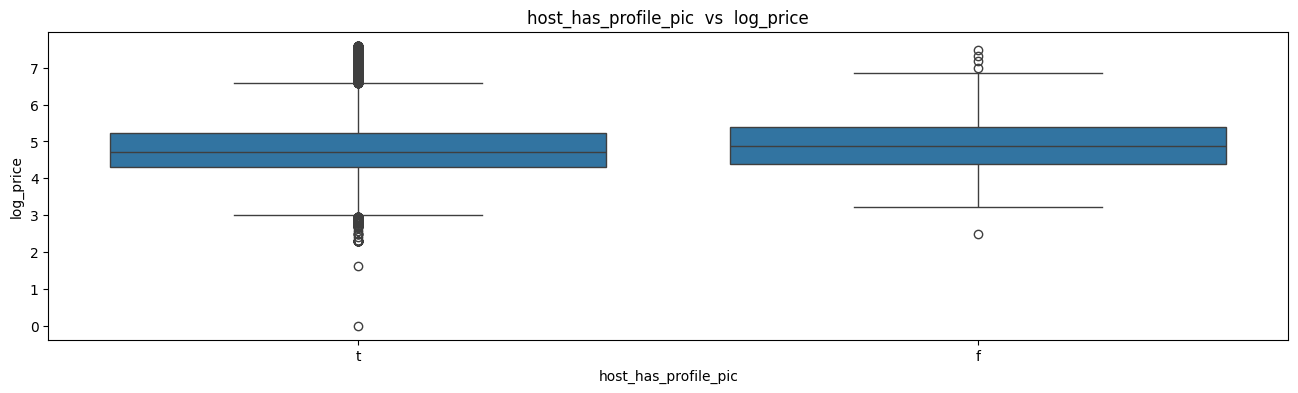

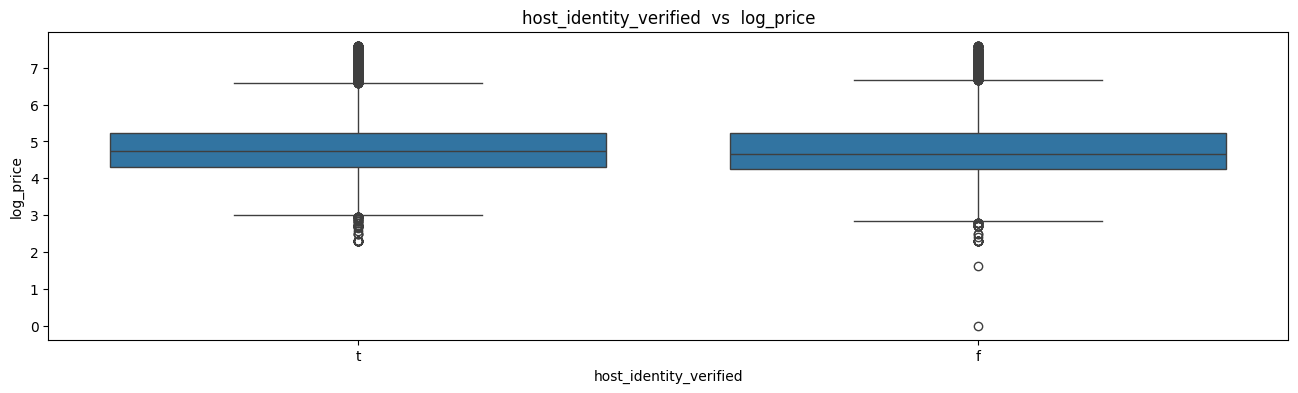

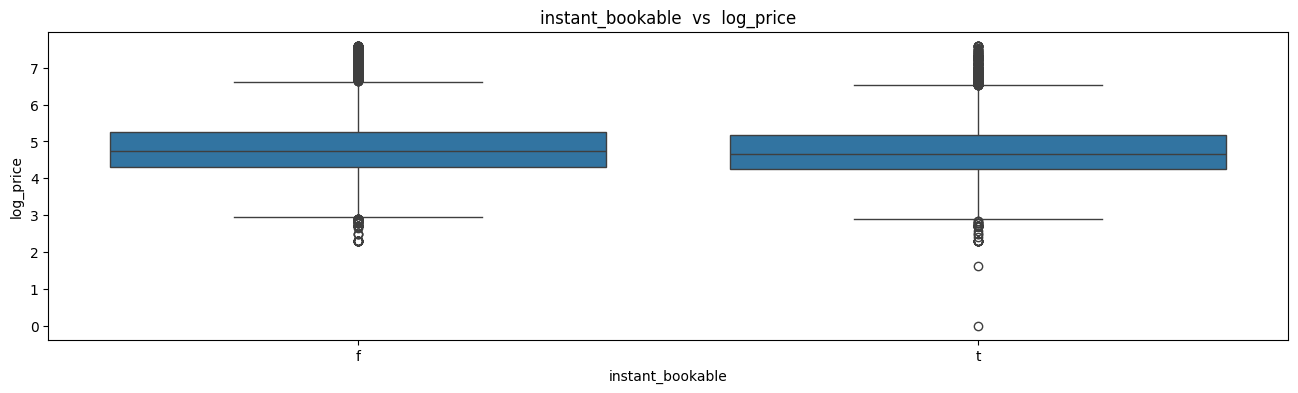

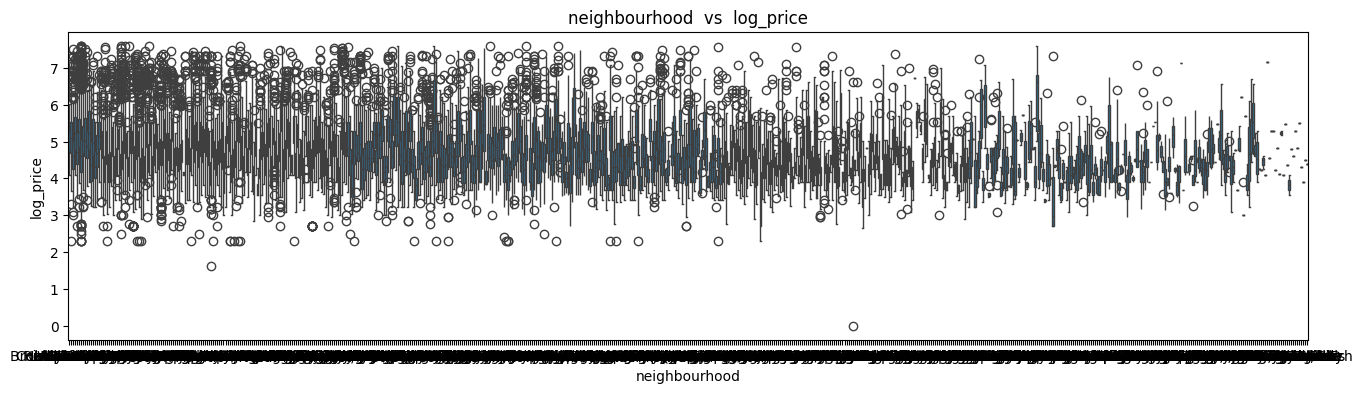

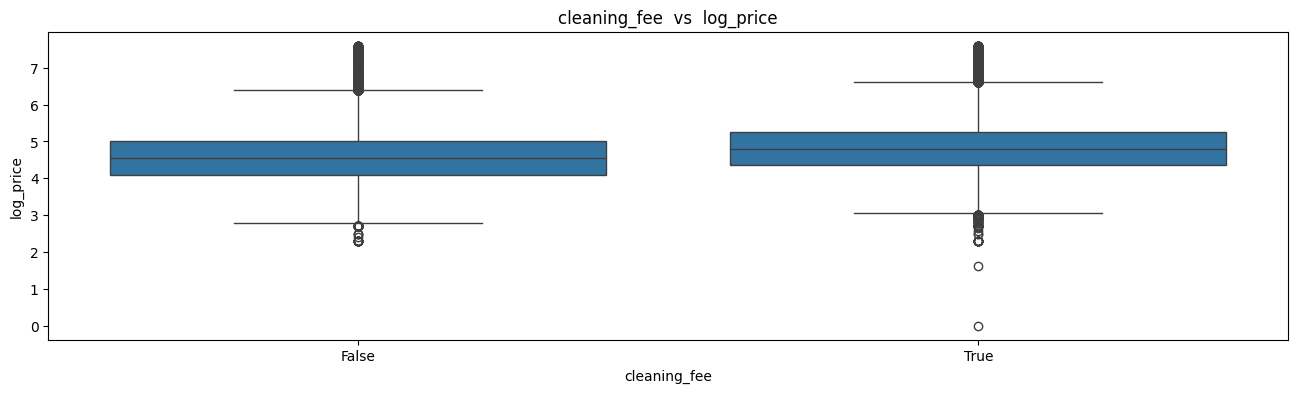

In [31]:
for i in cat_col:
    plt.figure(figsize=(16,4))
    sns.boxplot(x=df[i],y=df['log_price'])
    plt.title(f'{i}  vs  log_price')
    plt.show()

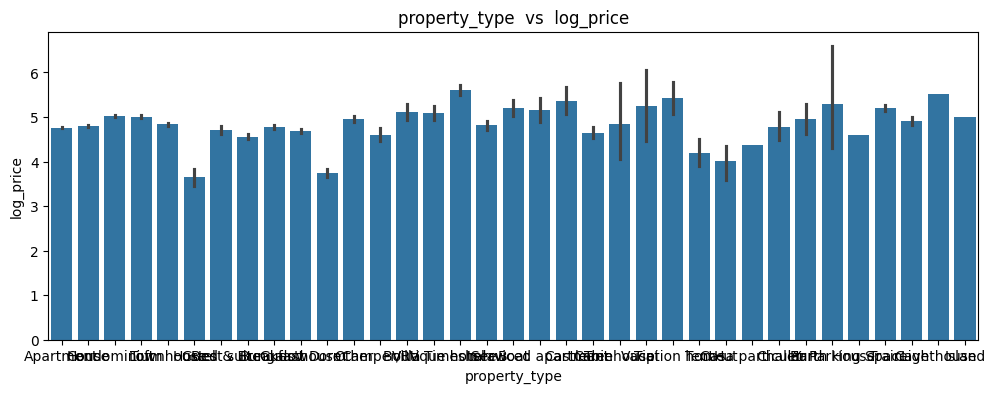

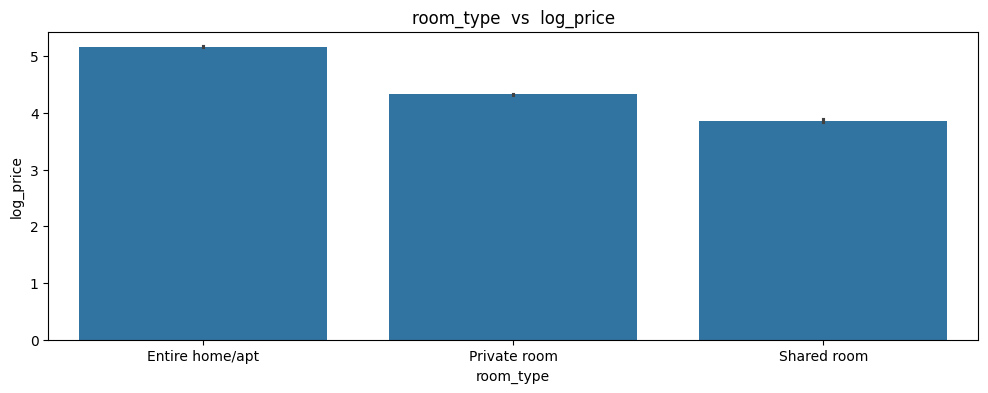

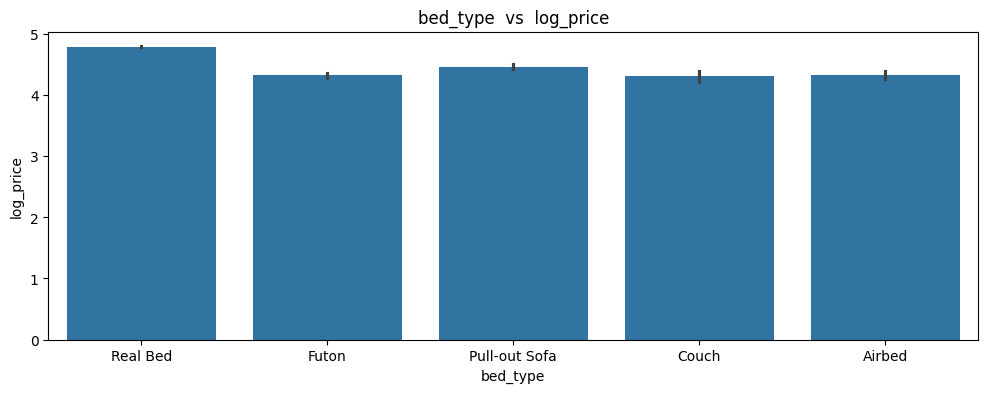

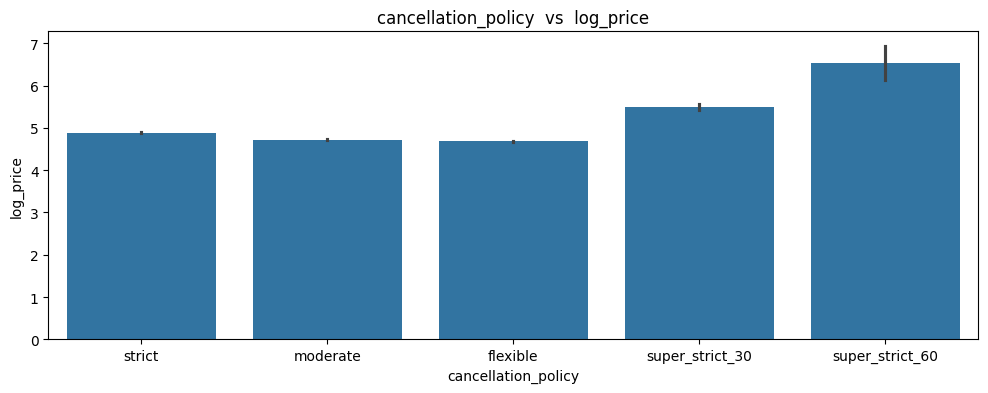

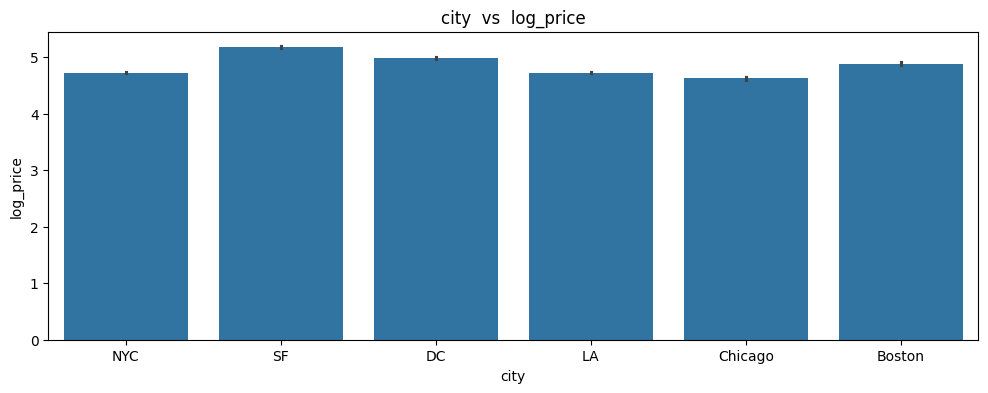

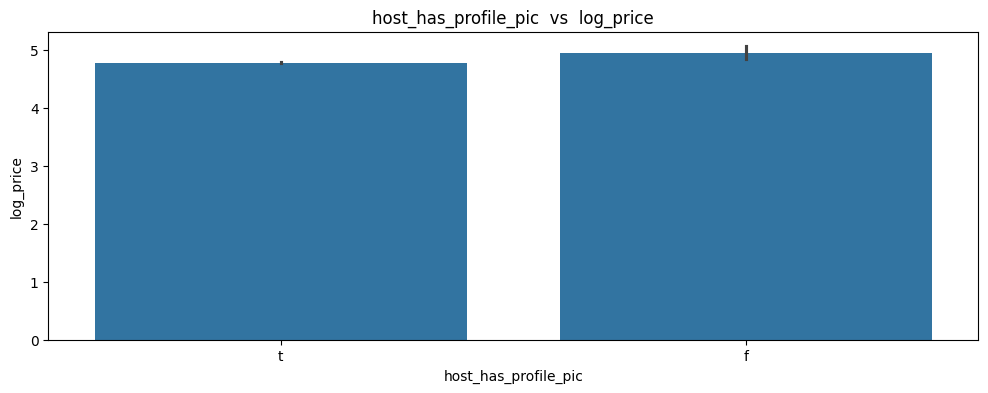

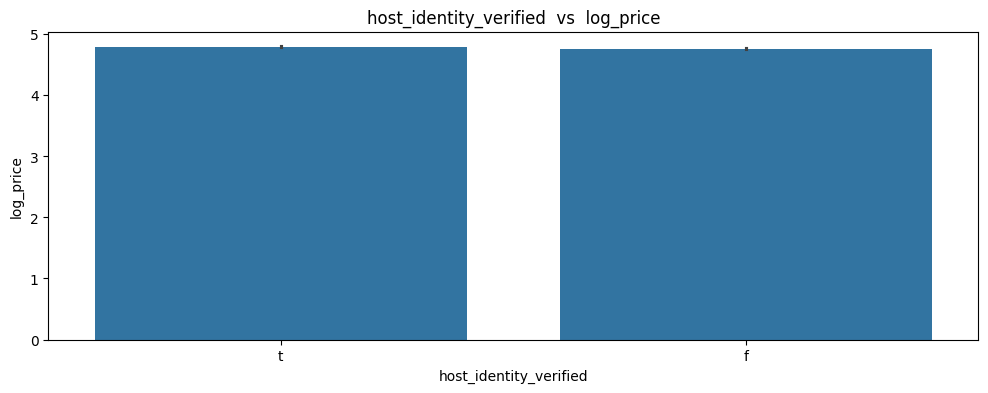

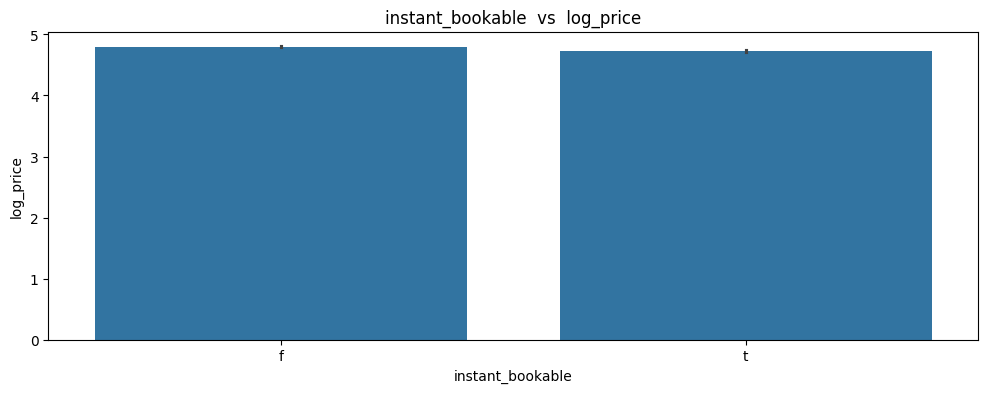

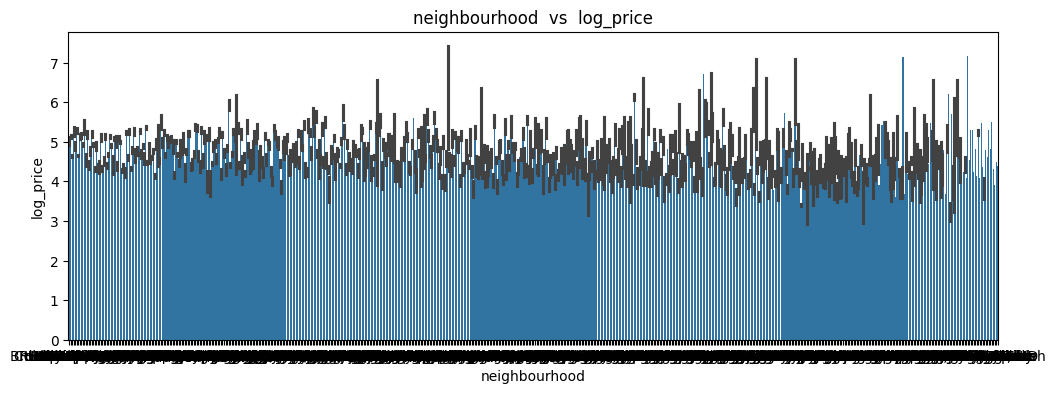

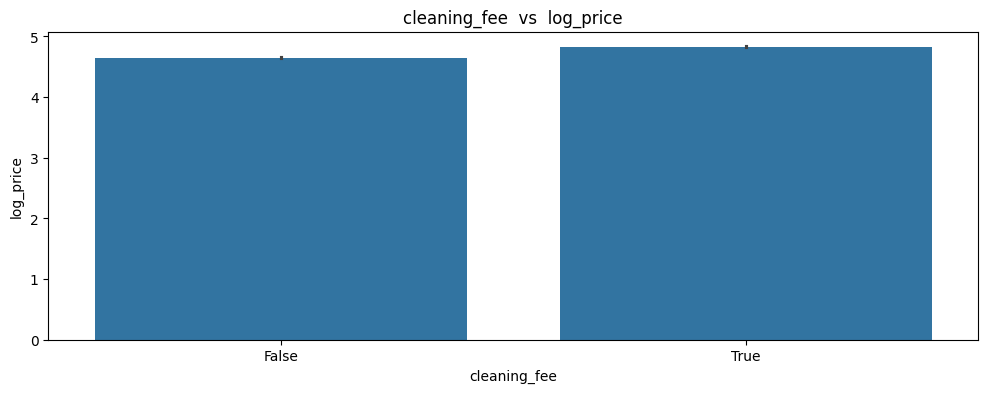

In [32]:
for i in cat_col:
    plt.figure(figsize=(12,4))
    sns.barplot(x=df[i],y=df['log_price'])
    plt.title(f'{i}  vs  log_price')
    plt.show()

In [33]:
df['city'].value_counts()

city
NYC        32349
LA         22453
SF          6434
DC          5688
Chicago     3719
Boston      3468
Name: count, dtype: int64

# insights :-

### room_type - Entire home/apt has high price than Private room and Shared room 

### property_type = Timeshare and Vacation home has a high price

### bed_type - real_bed has a high price

### cancellation_policy = super_strict_60 and super_strict_30 has high price than others

### city - SF has more price than big cities like NYC AND LA

### Multivariate Analysis: Heatmaps & Pairplots.

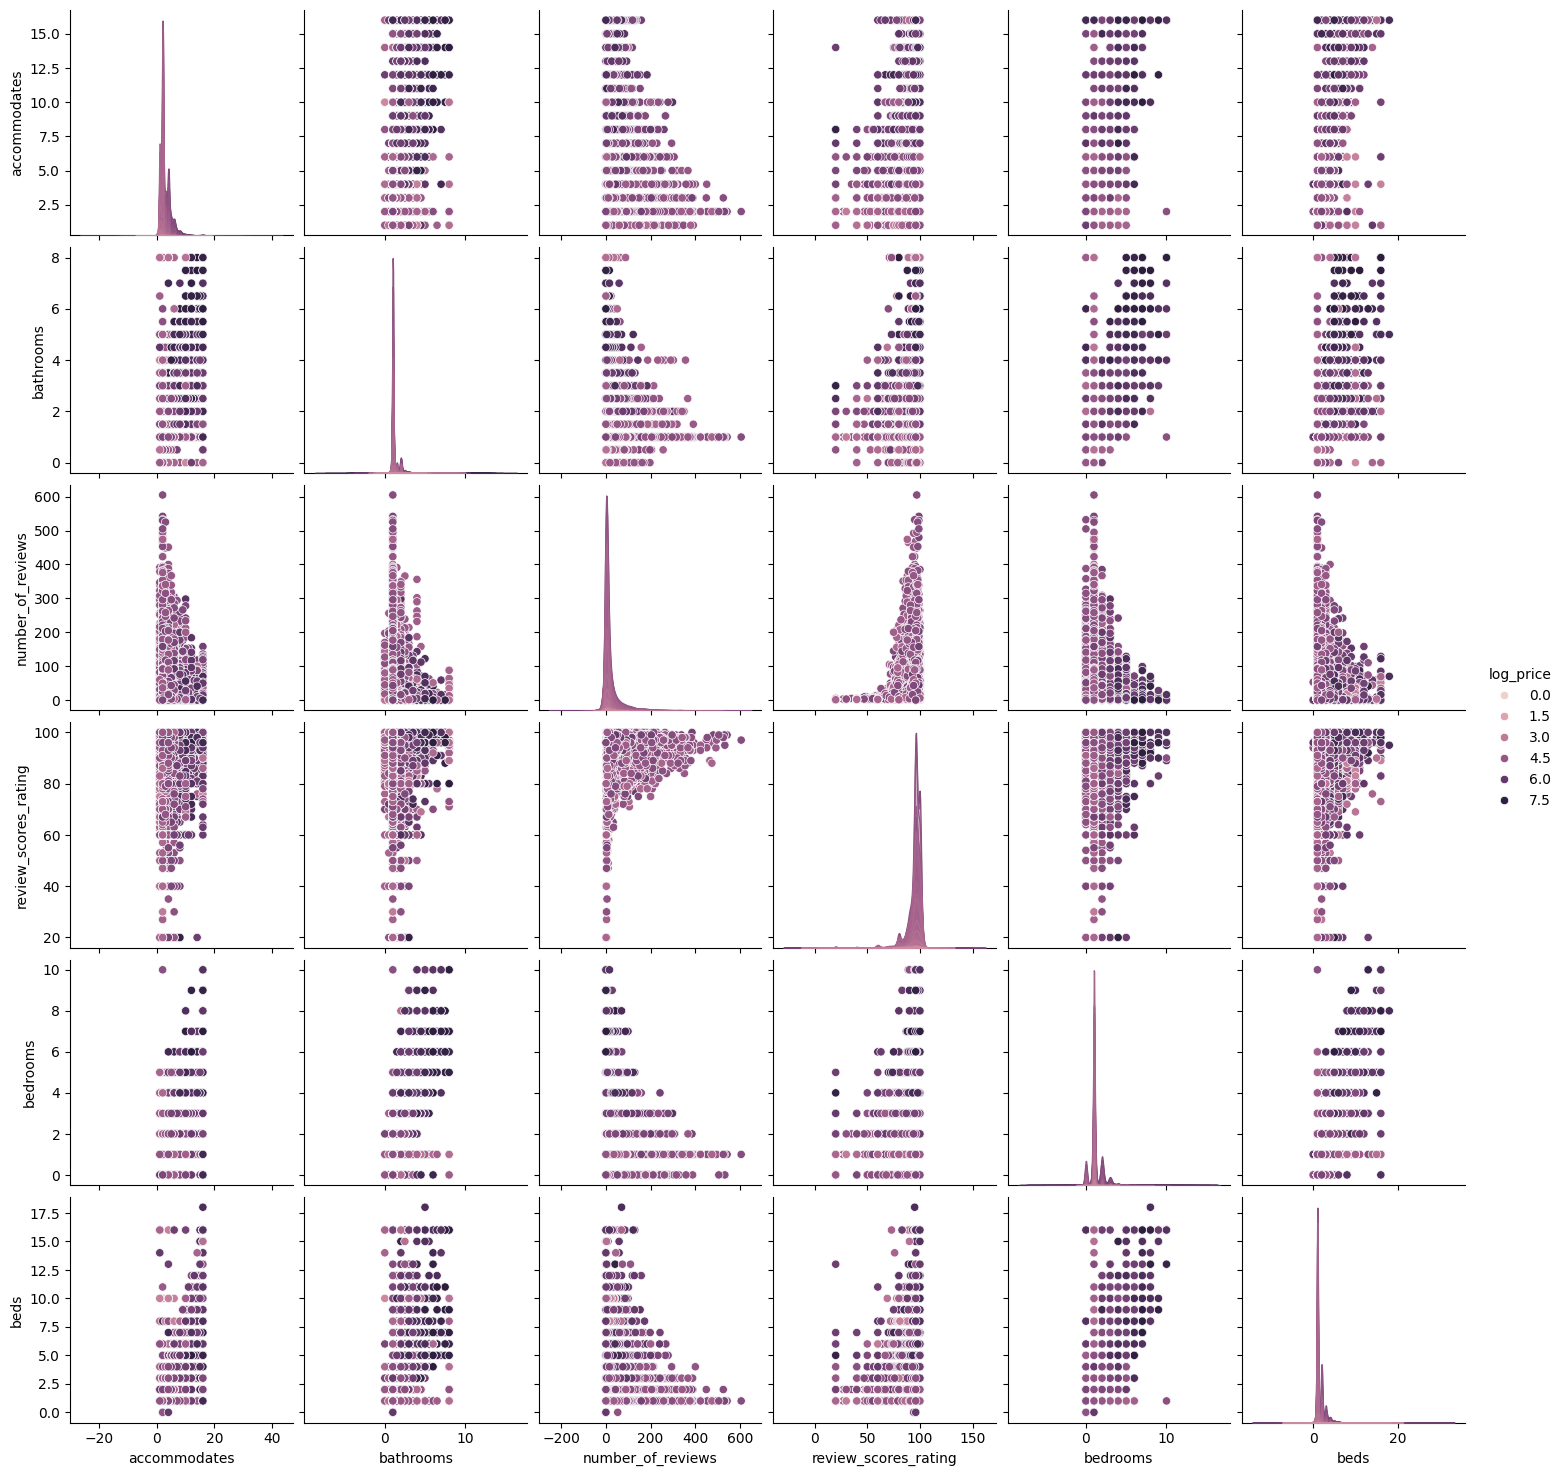

In [34]:
sns.pairplot(df[['log_price', 'accommodates', 'bathrooms','number_of_reviews', 'review_scores_rating', 'bedrooms','beds']],hue='log_price')
plt.show()

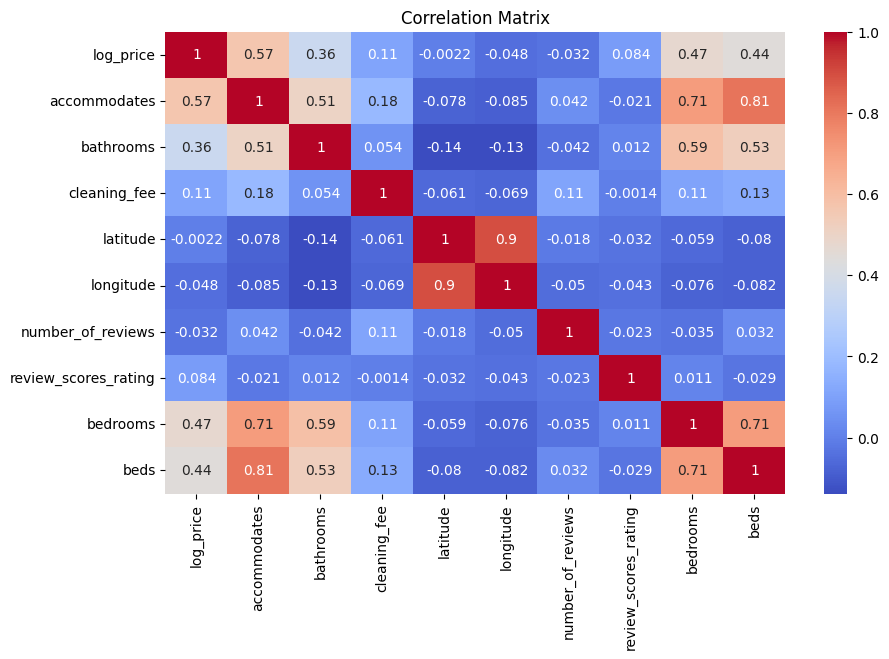

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# STEP 4: Outlier Detection & Handling

### Outlier detection

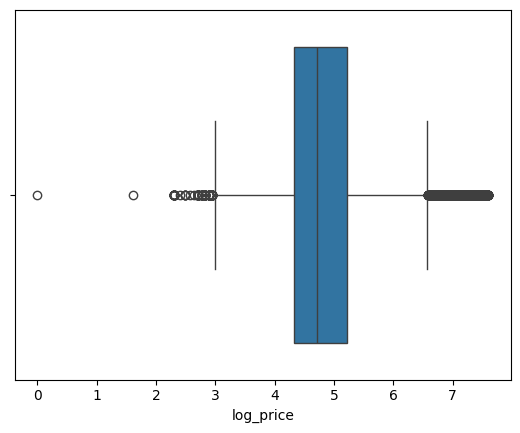

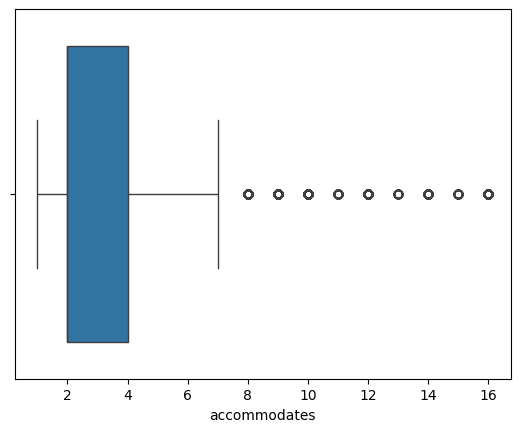

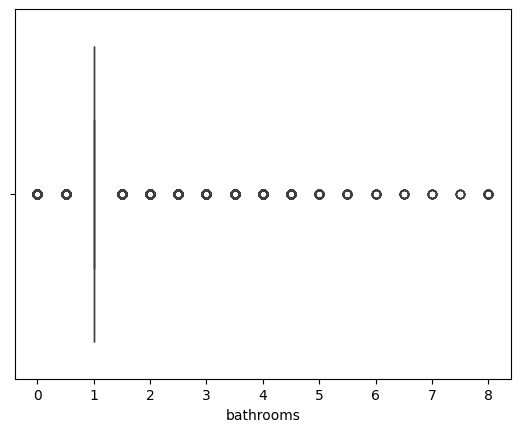

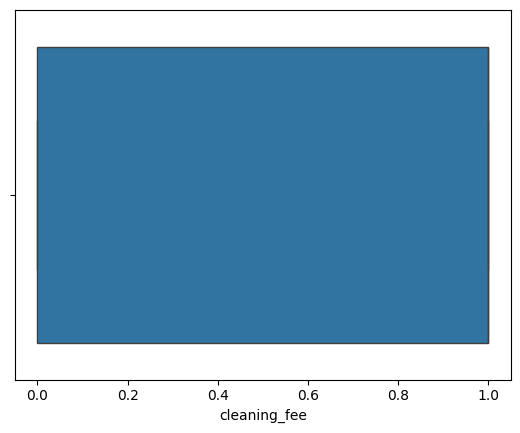

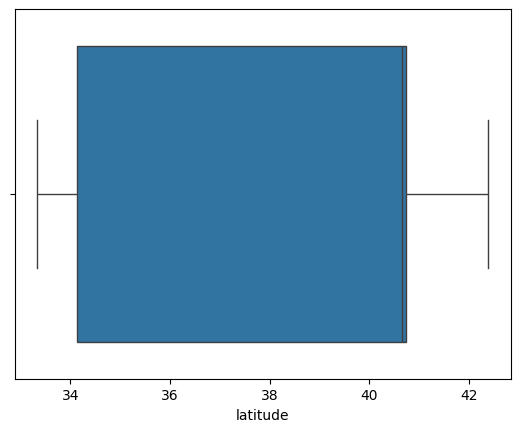

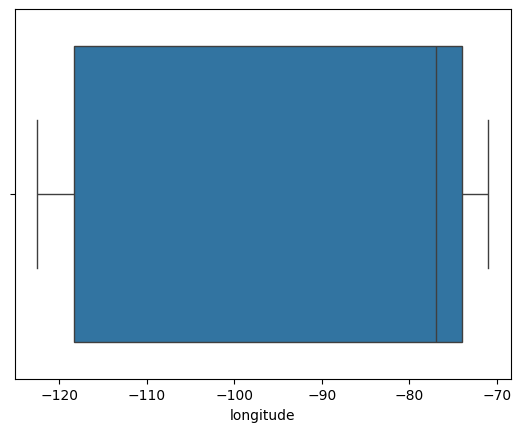

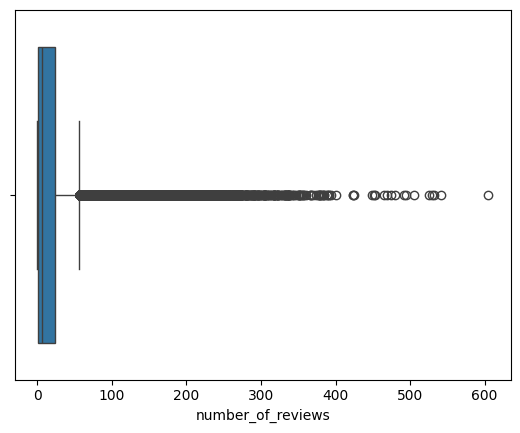

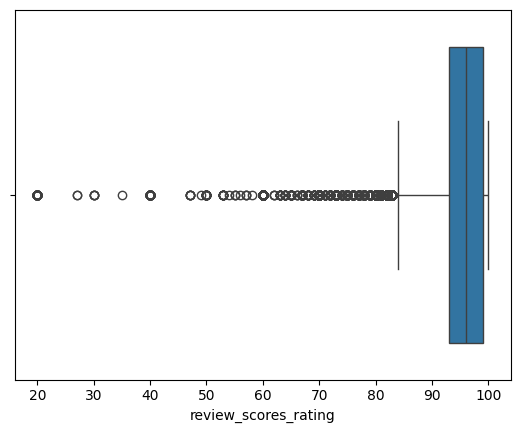

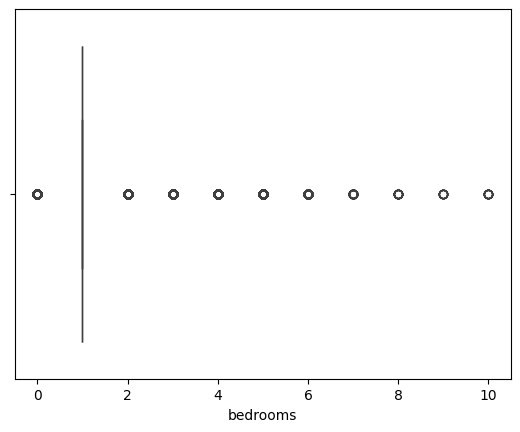

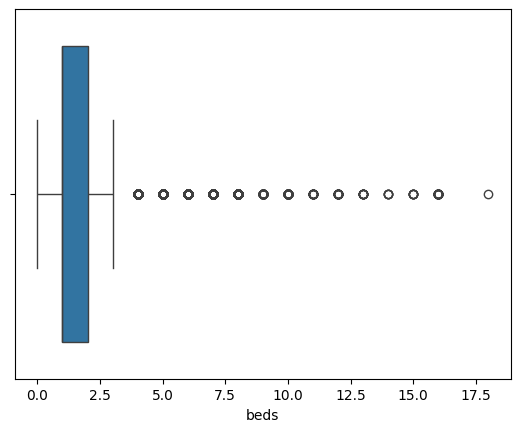

In [36]:
for i in num_col:
    sns.boxplot(x=df[i])
    plt.show()

In [37]:
df.describe(percentiles=[0.01,0.05,0.08,0.10,0.25,0.75,0.90,0.95,0.99])

,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,4.782069,3.155146,1.234628,38.445958,-92.397525,20.900568,94.503434,1.265467,1.709611
std,0.717394,2.153589,0.581386,3.080167,21.705322,37.828641,6.943159,0.851671,1.253389
min,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
1%,3.367296,1.000000,1.000000,33.790138,-122.464508,0.000000,65.000000,0.000000,1.000000
5%,3.688879,1.000000,1.000000,33.989601,-122.422906,0.000000,80.000000,0.000000,1.000000
8%,3.871201,1.000000,1.000000,34.019706,-122.400763,0.000000,86.000000,0.000000,1.000000
10%,3.912023,1.000000,1.000000,34.039386,-118.559001,0.000000,88.000000,1.000000,1.000000
25%,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,93.000000,1.000000,1.000000
50%,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000


In [38]:
outlier = ['log_price','accommodates','bathrooms','number_of_reviews','review_scores_rating','bedrooms','beds']

In [39]:
for i in outlier:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    iqr = Q3 - Q1
    higher = Q3 + 1.5*iqr
    lower = Q1 - 1.5*iqr
    print(f'{i} -- higher boundary: {higher}, lower boundary: {lower}')

log_price -- higher boundary: 6.5746573915000015, lower boundary: 2.9631865474999985
accommodates -- higher boundary: 7.0, lower boundary: -1.0
bathrooms -- higher boundary: 1.0, lower boundary: 1.0
number_of_reviews -- higher boundary: 56.0, lower boundary: -32.0
review_scores_rating -- higher boundary: 108.0, lower boundary: 84.0
bedrooms -- higher boundary: 1.0, lower boundary: 1.0
beds -- higher boundary: 3.5, lower boundary: -0.5


### Handling the outliers

In [40]:
df['log_price'] = df['log_price'].clip(lower=df['log_price'].quantile(0.01),upper=df['log_price'].quantile(0.95))
df['accommodates'] = df['accommodates'].clip(lower=1, upper=12)
df = df[df['bathrooms'] >= 1]
df['bathrooms'] = df['bathrooms'].clip(upper=3.5)
df['latitude'] = df['latitude'].clip(lower=33.790138, upper=42.358575)
df['longitude'] = df['longitude'].clip(lower=-122.464508, upper=-71.058920)
df['number_of_reviews'] = df['number_of_reviews'].clip(upper=178)
df['review_scores_rating'] = df['review_scores_rating'].clip(lower=65, upper=100)
df = df[df['bedrooms'] > 0]
df['bedrooms'] = df['bedrooms'].clip(upper=4)
df = df[df['beds'] > 0]
df['beds'] = df['beds'].clip(upper=6)

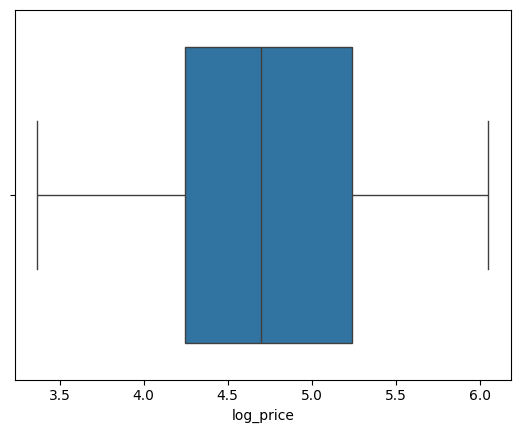

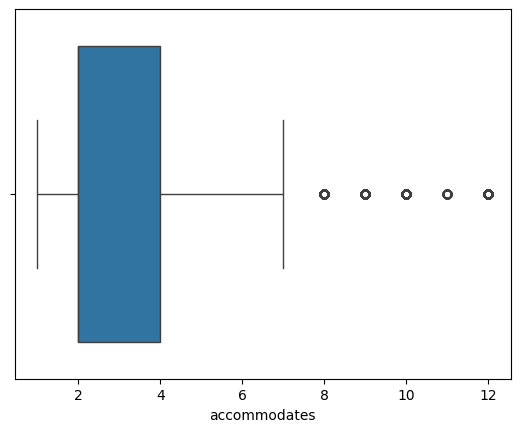

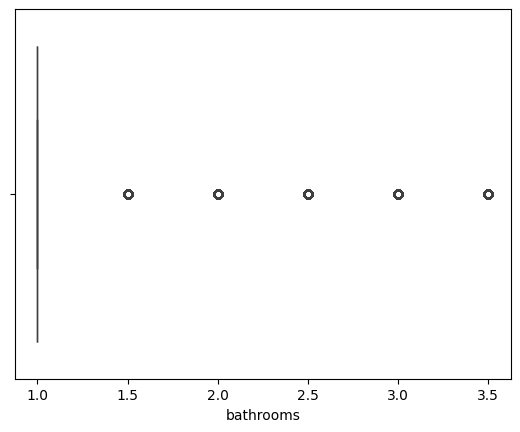

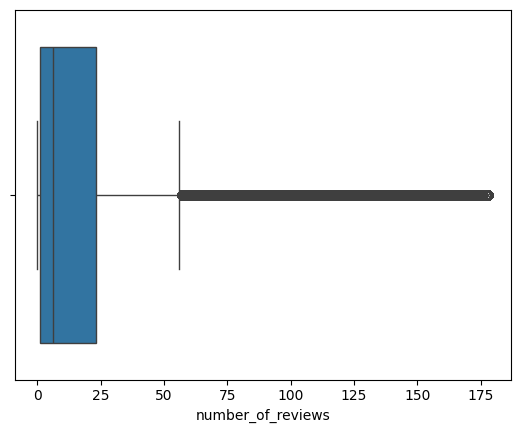

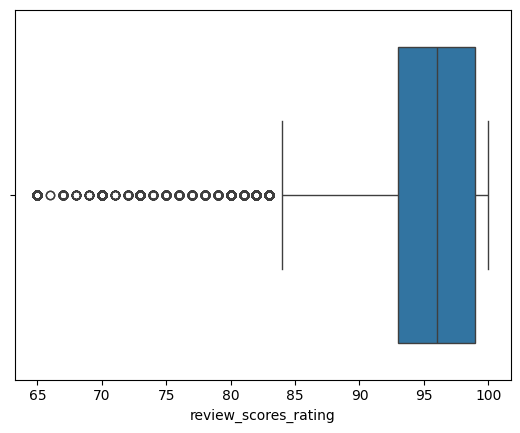

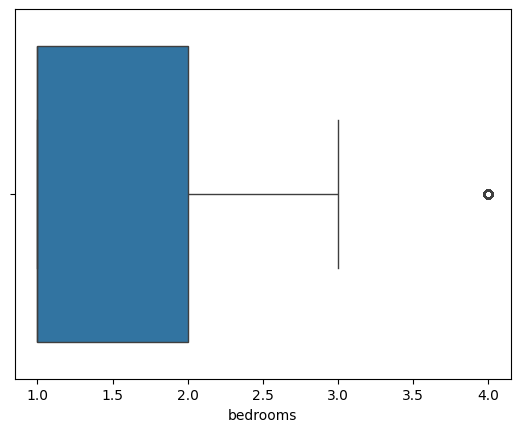

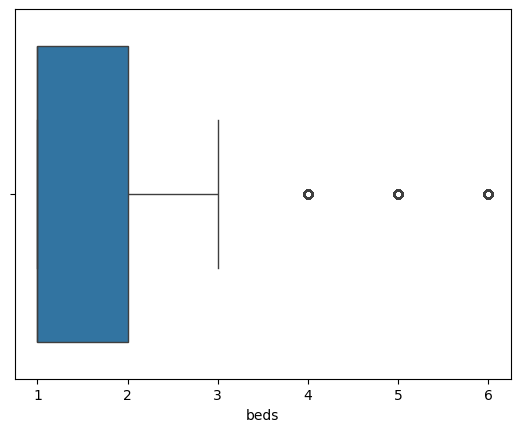

In [41]:
for i in outlier:
    sns.boxplot(x=df[i])
    plt.show()

In [42]:
df.describe(percentiles=[0.01,0.05,0.08,0.10,0.25,0.75,0.90,0.95,0.99])

,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,67030.000000,67030.000000,67030.000000,67030.000000,67030.000000,67030.000000,67030.000000,67030.000000,67030.000000
mean,4.759306,3.202924,1.250746,38.468067,-92.291430,20.026973,94.660898,1.381113,1.726854
std,0.668267,2.096594,0.529280,3.074741,21.674153,33.641945,6.037429,0.728694,1.131706
min,3.367296,1.000000,1.000000,33.790138,-122.464508,0.000000,65.000000,1.000000,1.000000
1%,3.367296,1.000000,1.000000,33.791299,-122.464508,0.000000,65.000000,1.000000,1.000000
5%,3.688879,1.000000,1.000000,33.989315,-122.423634,0.000000,80.000000,1.000000,1.000000
8%,3.850148,1.000000,1.000000,34.020110,-122.401121,0.000000,86.000000,1.000000,1.000000
10%,3.912023,1.000000,1.000000,34.039696,-118.563862,0.000000,88.000000,1.000000,1.000000
25%,4.248495,2.000000,1.000000,34.134727,-118.342821,1.000000,93.000000,1.000000,1.000000
50%,4.700480,2.000000,1.000000,40.663874,-76.994244,6.000000,96.000000,1.000000,1.000000


# Feature Engineering

### Create Interaction Features

In [43]:
neighbourhood_popularity = df.groupby('neighbourhood')['log_price'].mean().to_dict()
df['neighbourhood_popularity'] = df['neighbourhood'].map(neighbourhood_popularity)

In [44]:
df['host_activity_score'] = df['number_of_reviews'] / (df['review_scores_rating'] + 1)

In [45]:
df['num_amenities'] = df['amenities'].apply(lambda x: len(str(x).strip('{}').split(',')))

In [46]:
df['total_rooms'] = df['bedrooms'] + df['beds'] + df['bathrooms']
df['bed_to_bath_ratio'] = df['bedrooms'] / (df['bathrooms'] + 1)
df['accommodates_per_room'] = df['accommodates'] / (df['total_rooms'] + 1)

### Number of reviews (low/medium/high)

In [47]:
bins = [-1, 5, 20, 1000]
labels = ['low', 'medium', 'high']
df['reviews_bin'] = pd.cut(df['number_of_reviews'], bins=bins, labels=labels)

In [48]:
df['has_cleaning_fee'] = (df['cleaning_fee'] > 0).astype(int)

### Extract Location-based Features

In [49]:
from sklearn.cluster import KMeans

coords = df[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=10, random_state=42)
df['location_cluster'] = kmeans.fit_predict(coords)

In [50]:
df.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,beds,neighbourhood_popularity,host_activity_score,num_amenities,total_rooms,bed_to_bath_ratio,accommodates_per_room,reviews_bin,has_cleaning_fee,location_cluster
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,1.0,5.029696,0.019802,9,3.0,0.5,0.750000,low,1,7
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,3.0,5.114320,0.063830,15,7.0,1.5,0.875000,medium,1,2
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,3.0,4.623663,0.107527,19,5.0,0.5,0.833333,medium,1,2
3,6.052089,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,2.0,5.205836,0.000000,15,5.0,1.0,0.666667,low,1,3
5,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,SF,...,1.0,5.255618,0.029703,10,3.0,0.5,0.500000,low,1,3


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67030 entries, 0 to 74110
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   log_price                 67030 non-null  float64 
 1   property_type             67030 non-null  object  
 2   room_type                 67030 non-null  object  
 3   amenities                 67030 non-null  object  
 4   accommodates              67030 non-null  int64   
 5   bathrooms                 67030 non-null  float64 
 6   bed_type                  67030 non-null  object  
 7   cancellation_policy       67030 non-null  object  
 8   cleaning_fee              67030 non-null  bool    
 9   city                      67030 non-null  object  
 10  host_has_profile_pic      67030 non-null  object  
 11  host_identity_verified    67030 non-null  object  
 12  instant_bookable          67030 non-null  object  
 13  latitude                  67030 non-null  float64 


In [52]:
#### 1. Categorical columns
categorical_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 
                    'city', 'host_has_profile_pic', 'host_identity_verified', 
                    'instant_bookable', 'neighbourhood', 'zipcode']

#### 2. Boolean columns
boolean_cols = ['cleaning_fee', 'has_cleaning_fee']

#### 3. Numerical columns
numerical_cols = ['accommodates', 'bathrooms', 'number_of_reviews', 'review_scores_rating', 
                  'bedrooms', 'beds', 'total_rooms', 'bed_to_bath_ratio', 'accommodates_per_room', 
                  'latitude', 'longitude', 'location_cluster','host_activity_score','neighbourhood_popularity','num_amenities']


### Preprocessing pipelines for numerical and categorical data

In [53]:
categorical_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

boolean_pipeline = Pipeline(steps=[
    ('encoder', FunctionTransformer(lambda x: x.astype(int)))
])

In [54]:
# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols),
        ('bool', boolean_pipeline, boolean_cols)
    ])

### split the data into train, test, val

In [55]:
X = df.drop(['log_price','amenities'], axis=1)
y = df['log_price']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Linear Regression

In [56]:
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [57]:
linear_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['accommodates', 'bathrooms',
                                                   'number_of_reviews',
                                                   'review_scores_rating',
                                                   'bedrooms', 'beds',
                                                   'total_rooms',
                                                   'bed_to_bath_ratio',
                                                   'accommodates_per_room',
                                                   'latitude', 'longitude',
                                                   'location_cluster',
                                                   'host_activity_score',
                                                   'neighbourhood_popular...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['property_type', 'room_type',
                                                   'bed_type',
                                                   'cancellation_policy',
                                                   'city',
                                                   'host_has_profile_pic',
                                                   'host_identity_verified',
                                                   'instant_bookable',
                                                   'neighbourhood',
                                                   'zipcode']),
                                                 ('bool',
                                                  Pipeline(steps=[('encoder',
                                                                   FunctionTransformer(func=<function <lambda> at 0x000001CF4C947420>))]),
                                                  ['cleaning_fee',
                                                   'has_cleaning_fee'])])),
                ('regressor', LinearRegression())])

In [58]:
y_val_pred = linear_model.predict(X_val)

rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

print(f"Linear Regression - Validation RMSE: {rmse_val:.2f}")
print(f"Linear Regression - Validation R²: {r2_val:.2f}")
print(f"Linear Regression - Validation MAE: {mae_val:.2f}")

Linear Regression - Validation RMSE: 0.37
Linear Regression - Validation R²: 0.69
Linear Regression - Validation MAE: 0.28


In [59]:
y_test_pred = linear_model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Linear Regression - test RMSE: {rmse_test:.2f}")
print(f"Linear Regression - test R²: {r2_test:.2f}")
print(f"Linear Regression - test MAE: {mae_test:.2f}")

Linear Regression - test RMSE: 0.37
Linear Regression - test R²: 0.69
Linear Regression - test MAE: 0.28


## Decision tree

In [60]:
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

In [61]:
dt_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['accommodates', 'bathrooms',
                                                   'number_of_reviews',
                                                   'review_scores_rating',
                                                   'bedrooms', 'beds',
                                                   'total_rooms',
                                                   'bed_to_bath_ratio',
                                                   'accommodates_per_room',
                                                   'latitude', 'longitude',
                                                   'location_cluster',
                                                   'host_activity_score',
                                                   'neighbourhood_popular...
                                                  ['property_type', 'room_type',
                                                   'bed_type',
                                                   'cancellation_policy',
                                                   'city',
                                                   'host_has_profile_pic',
                                                   'host_identity_verified',
                                                   'instant_bookable',
                                                   'neighbourhood',
                                                   'zipcode']),
                                                 ('bool',
                                                  Pipeline(steps=[('encoder',
                                                                   FunctionTransformer(func=<function <lambda> at 0x000001CF4C947420>))]),
                                                  ['cleaning_fee',
                                                   'has_cleaning_fee'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [62]:
y_val_pred = dt_model.predict(X_val)

rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

print(f"Decision Tree - Validation RMSE: {rmse_val:.2f}")
print(f"Decision Tree - Validation R²: {r2_val:.2f}")
print(f"Decision Tree - Validation MAE: {mae_val:.2f}")

Decision Tree - Validation RMSE: 0.49
Decision Tree - Validation R²: 0.46
Decision Tree - Validation MAE: 0.36


In [63]:
y_test_pred = dt_model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Decision Tree - test RMSE: {rmse_test:.2f}")
print(f"Decision Tree - test R²: {r2_test:.2f}")
print(f"Decision Tree - test MAE: {mae_test:.2f}")

Decision Tree - test RMSE: 0.49
Decision Tree - test R²: 0.46
Decision Tree - test MAE: 0.36


#  Train a Random Forest Regressor

In [64]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42,n_jobs=-1))
])

In [65]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['accommodates', 'bathrooms',
                                                   'number_of_reviews',
                                                   'review_scores_rating',
                                                   'bedrooms', 'beds',
                                                   'total_rooms',
                                                   'bed_to_bath_ratio',
                                                   'accommodates_per_room',
                                                   'latitude', 'longitude',
                                                   'location_cluster',
                                                   'host_activity_score',
                                                   'neighbourhood_popular...
                                                  ['property_type', 'room_type',
                                                   'bed_type',
                                                   'cancellation_policy',
                                                   'city',
                                                   'host_has_profile_pic',
                                                   'host_identity_verified',
                                                   'instant_bookable',
                                                   'neighbourhood',
                                                   'zipcode']),
                                                 ('bool',
                                                  Pipeline(steps=[('encoder',
                                                                   FunctionTransformer(func=<function <lambda> at 0x000001CF4C947420>))]),
                                                  ['cleaning_fee',
                                                   'has_cleaning_fee'])])),
                ('regressor',
                 RandomForestRegressor(n_jobs=-1, random_state=42))])

In [66]:
y_val_pred = rf_model.predict(X_val)

rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

print(f"Random Forest - Validation RMSE: {rmse_val:.2f}")
print(f"Random Forest - Validation R²: {r2_val:.2f}")
print(f"Random Forest - Validation MAE: {mae_val:.2f}")

Random Forest - Validation RMSE: 0.36
Random Forest - Validation R²: 0.71
Random Forest - Validation MAE: 0.27


In [67]:
y_test_pred = rf_model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Random Forest - Test RMSE: {rmse_test:.2f}")
print(f"Random Forest - Test R²: {r2_test:.2f}")
print(f"Random Forest - Test MAE: {mae_test:.2f}")

Random Forest - Test RMSE: 0.35
Random Forest - Test R²: 0.72
Random Forest - Test MAE: 0.27


### XGBoost Regressor

In [68]:
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)

In [69]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

In [70]:
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['accommodates', 'bathrooms',
                                                   'number_of_reviews',
                                                   'review_scores_rating',
                                                   'bedrooms', 'beds',
                                                   'total_rooms',
                                                   'bed_to_bath_ratio',
                                                   'accommodates_per_room',
                                                   'latitude', 'longitude',
                                                   'location_cluster',
                                                   'host_activity_score',
                                                   'neighbourhood_popular...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [71]:
y_val_pred = xgb_pipeline.predict(X_val)

rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

print(f"Random Forest - Validation RMSE: {rmse_val:.2f}")
print(f"Random Forest - Validation R²: {r2_val:.2f}")
print(f"Random Forest - Validation MAE: {mae_val:.2f}")

Random Forest - Validation RMSE: 0.35
Random Forest - Validation R²: 0.72
Random Forest - Validation MAE: 0.26


In [72]:
y_test_pred = xgb_pipeline.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Random Forest - Test RMSE: {rmse_test:.2f}")
print(f"Random Forest - Test R²: {r2_test:.2f}")
print(f"Random Forest - Test MAE: {mae_test:.2f}")

Random Forest - Test RMSE: 0.35
Random Forest - Test R²: 0.73
Random Forest - Test MAE: 0.26


# Decision Tree Regressor + Hyperparameter Tuning

In [73]:
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

param_grid_dt = {
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(dt_model, param_grid=param_grid_dt,
                              cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)

best_dt_model = grid_search_dt.best_estimator_
print("Best Decision Tree Parameters:", grid_search_dt.best_params_)

Best Decision Tree Parameters: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10}


#  Random Forest Regressor + Hyperparameter Tuning

In [74]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Param grid
param_list = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2],
    'regressor__max_features': ['auto', 'sqrt']
}


random_search = RandomizedSearchCV(rf_model, param_distributions=param_list, 
                                   n_iter=20, cv=3, scoring='neg_mean_squared_error', 
                                   verbose=2, n_jobs=-1)

random_search.fit(X_train, y_train)

best_rf_model = random_search.best_estimator_
print("Best RF Parameters:", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best RF Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': None}


#  XGBoost Regressor + Hyperparameter Tuning

In [75]:
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, objective='reg:squarederror'))
])

param_grid_xgb = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 6, 10],
    'regressor__learning_rate': [0.01, 0.1, 0.3]
}

grid_search_xgb = GridSearchCV(xgb_model, param_grid=param_grid_xgb,
                               cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)

best_xgb_model = grid_search_xgb.best_estimator_
print("Best XGBoost Parameters:", grid_search_xgb.best_params_)

Best XGBoost Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 6, 'regressor__n_estimators': 200}


# Evaluate All Tuned Models on Validation Set

In [76]:
y_val_pred_rf = best_rf_model.predict(X_val)
y_val_pred_xgb = best_xgb_model.predict(X_val)
y_val_pred_dt = best_dt_model.predict(X_val)

rmse_val_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))
r2_val_rf = r2_score(y_val, y_val_pred_rf)
mae_val_rf = mean_absolute_error(y_val, y_val_pred_rf)

rmse_val_xgb = np.sqrt(mean_squared_error(y_val, y_val_pred_xgb))
r2_val_xgb = r2_score(y_val, y_val_pred_xgb)
mae_val_xgb = mean_absolute_error(y_val, y_val_pred_xgb)

rmse_val_dt = np.sqrt(mean_squared_error(y_val, y_val_pred_dt))
r2_val_dt = r2_score(y_val, y_val_pred_dt)
mae_val_dt = mean_absolute_error(y_val, y_val_pred_dt)


validation_performance = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Decision Tree'],
    'Val RMSE': [rmse_val_rf, rmse_val_xgb, rmse_val_dt],
    'Val R²': [r2_val_rf, r2_val_xgb, r2_val_dt],
    'Val MAE': [mae_val_rf, mae_val_xgb, mae_val_dt]
})

print("\n=== Validation Set Performance Summary ===")
print(validation_performance)


=== Validation Set Performance Summary ===
           Model  Val RMSE    Val R²   Val MAE
0  Random Forest  0.368515  0.695417  0.283750
1        XGBoost  0.349603  0.725878  0.262368
2  Decision Tree  0.382617  0.671661  0.287053


# Evaluate All Tuned Models on Test Set

In [77]:
y_test_pred_rf = best_rf_model.predict(X_test)
y_test_pred_xgb = best_xgb_model.predict(X_test)
y_test_pred_dt = best_dt_model.predict(X_test)


rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
r2_test_rf = r2_score(y_test, y_test_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)

rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb)

rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))
r2_test_dt = r2_score(y_test, y_test_pred_dt)
mae_test_dt = mean_absolute_error(y_test, y_test_pred_dt)


performance_summary = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Decision Tree'],
    'Test RMSE': [rmse_test_rf, rmse_test_xgb, rmse_test_dt],
    'Test R²': [r2_test_rf, r2_test_xgb, r2_test_dt],
    'Test MAE': [mae_test_rf, mae_test_xgb, mae_test_dt]
})

print("\n=== Test Set Performance Summary ===")
print(performance_summary)


=== Test Set Performance Summary ===
           Model  Test RMSE   Test R²  Test MAE
0  Random Forest   0.365334  0.698981  0.282473
1        XGBoost   0.347709  0.727326  0.262653
2  Decision Tree   0.379700  0.674843  0.286476


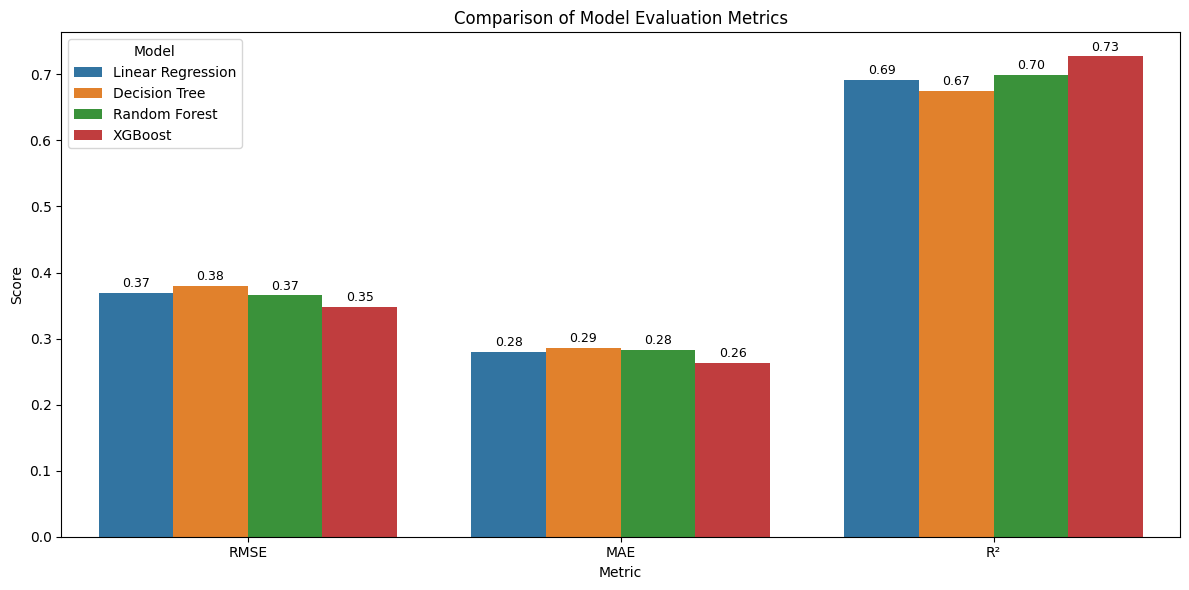

In [78]:
models = {
    'Linear Regression': linear_model,
    'Decision Tree': best_dt_model,
    'Random Forest': best_rf_model,
    'XGBoost': best_xgb_model
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, 'RMSE', rmse])
    results.append([name, 'MAE', mae])
    results.append([name, 'R²', r2])

results_df = pd.DataFrame(results, columns=['Model', 'Metric', 'Score'])

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Metric', y='Score', hue='Model', data=results_df)
plt.title('Comparison of Model Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=2)

plt.tight_layout()
plt.show()


### so we select XGBoost as the best model

video link - https://drive.google.com/file/d/19rZY9PJ7bn6VbXVQLy01Su2wJKbdQ5oP/view?usp=sharing